# **Bagian A**

Membuka file sales.xlsx dan menginisiasi sheet dalam excel menjadi sebuah dataframe

In [ ]:
import pandas as pd

file_path = '/content/sales.xlsx'
sales_data = pd.ExcelFile(file_path)
sales_data.sheet_names

['SalesData', 'Product', 'Customer', 'SalesRep']

In [ ]:
df_sales = sales_data.parse('SalesData')
df_product = sales_data.parse('Product')
df_customer = sales_data.parse('Customer')
df_sales_rep = sales_data.parse('SalesRep')


## **1. a. Hitung total penjualan tahunan untuk setiap produk selama periode tertentu.**

Nilai moneter adalah jumlah penjualan dari suatu produk, artinya nilai moneter sudah mewakili jumlah penjualan. Sehingga, untuk mendapatkan total penjualan tahunan setiap produk, kami menambahkan Sales Amount/nilai moneter suatu barang dengan tahun yang sama.

Dari total penjualan setiap tahun, dapat didapatkan total penjualan perproduk pada 3 tahun (2021,2022,2023). Jagung dengan product id S2020 menduduki total penjualan tiga tahun tertinggi.

*dapat dilihat dari code dibawah ini*



In [ ]:

total_penjualan_per_produk = df_sales.groupby(['Year', 'ProductID'])['Sales Amount (in US$)'].sum().reset_index()
total_penjualan_per_produk = total_penjualan_per_produk.merge(df_product[['ProductID', 'Product Name']], on='ProductID')
total_penjualan_per_produk['Product_ID_Name'] = total_penjualan_per_produk['ProductID'].astype(str) + ' - ' + total_penjualan_per_produk['Product Name']
total_penjualan_per_produk


Year ProductID  Sales Amount (in US$)    Product Name  \
0   2021     F3030               998400.0   Nitrogen-rich   
1   2021     F3031               639000.0  Potassium-rich   
2   2021     F3032               499800.0  Phosporus-rich   
3   2021     S2020              1965000.0            Corn   
4   2021     S2021              1144000.0        Soybeans   
5   2021     S2022               731000.0           Wheat   
6   2022     F3030               605800.0   Nitrogen-rich   
7   2022     F3031               725000.0  Potassium-rich   
8   2022     F3032               310800.0  Phosporus-rich   
9   2022     S2020              1458000.0            Corn   
10  2022     S2021              1020000.0        Soybeans   
11  2022     S2022               456000.0           Wheat   
12  2023     F3030               981500.0   Nitrogen-rich   
13  2023     F3031               735000.0  Potassium-rich   
14  2023     F3032               513800.0  Phosporus-rich   
15  2023     S2020              2109000.0            Corn   
16  2023     S2021              1188000.0        Soybeans   
17  2023     S2022               762000.0           Wheat   

           Product_ID_Name  
0    F3030 - Nitrogen-rich  
1   F3031 - Potassium-rich  
2   F3032 - Phosporus-rich  
3             S2020 - Corn  
4         S2021 - Soybeans  
5            S2022 - Wheat  
6    F3030 - Nitrogen-rich  
7   F3031 - Potassium-rich  
8   F3032 - Phosporus-rich  
9             S2020 - Corn  
10        S2021 - Soybeans  
11           S2022 - Wheat  
12   F3030 - Nitrogen-rich  
13  F3031 - Potassium-rich  
14  F3032 - Phosporus-rich  
15            S2020 - Corn  
16        S2021 - Soybeans  
17           S2022 - Wheat

In [ ]:

total_penjualan_per_produk = total_penjualan_per_produk.drop(['ProductID', 'Product Name'], axis=1, errors='ignore')
cols = ['Year', 'Product_ID_Name', 'Sales Amount (in US$)']
total_penjualan_per_produk = total_penjualan_per_produk[cols]
total_penjualan_per_produk


Year         Product_ID_Name  Sales Amount (in US$)
0   2021   F3030 - Nitrogen-rich               998400.0
1   2021  F3031 - Potassium-rich               639000.0
2   2021  F3032 - Phosporus-rich               499800.0
3   2021            S2020 - Corn              1965000.0
4   2021        S2021 - Soybeans              1144000.0
5   2021           S2022 - Wheat               731000.0
6   2022   F3030 - Nitrogen-rich               605800.0
7   2022  F3031 - Potassium-rich               725000.0
8   2022  F3032 - Phosporus-rich               310800.0
9   2022            S2020 - Corn              1458000.0
10  2022        S2021 - Soybeans              1020000.0
11  2022           S2022 - Wheat               456000.0
12  2023   F3030 - Nitrogen-rich               981500.0
13  2023  F3031 - Potassium-rich               735000.0
14  2023  F3032 - Phosporus-rich               513800.0
15  2023            S2020 - Corn              2109000.0
16  2023        S2021 - Soybeans              1188000.0
17  2023           S2022 - Wheat               762000.0

In [ ]:
penjualan_produk_pertigatahun = total_penjualan_per_produk.groupby('Product_ID_Name')['Sales Amount (in US$)'].sum().reset_index()
penjualan_produk_pertigatahun

Product_ID_Name  Sales Amount (in US$)
0   F3030 - Nitrogen-rich              2585700.0
1  F3031 - Potassium-rich              2099000.0
2  F3032 - Phosporus-rich              1324400.0
3            S2020 - Corn              5532000.0
4        S2021 - Soybeans              3352000.0
5           S2022 - Wheat              1949000.0

# **1. b Tentukan rata-rata penjualan per pelanggan berdasarkan karakteristiknya.**

Ditemukan bahwa pembeli dari type 'farm' atau 'petani' yang berasal dati kota Illnois memiliki angka penjualan paling tinggi, maka dari itu CustomerType Farm yang berlokasi di Illnoise dikatakan sebagai pelanggan besar.

Selain itu, yang menduduki penjualan terbesar kedua adalah customer dengan tipe retailer / retail dan berlokasi di Iowa. Dikatakan juga sebagai pelanggan besar karena memiliki penjualan terbesar kedua.

*dapat dilihat dari hasil output code dibawah ini*

In [ ]:
gabungansalescostumer = df_sales.merge(df_customer, on='CustomerID')
rata_sales_cust = gabungansalescostumer.groupby(['CustomerType', 'Size', 'Location'])['Sales Amount (in US$)'].mean().reset_index()
rata_sales_cust

CustomerType    Size  Location  Sales Amount (in US$)
0         Farm     Big  Illinois           26089.272031
1         Farm  Medium  Nebraska            7541.276596
2     Retailer     Big      Iowa           25196.265560
3     Retailer  Medium   Indiana            8352.290076

# **1. c. Identifikasi 3 perwakilan penjualan teratas berdasarkan total penjualan.**

Perwakilan penjualan disebut juga sales representative, Pengggunaan SalesRepID merupakan primary key yang membantu menjawab persoalan ini. Dari SalesRepID didapatkan nama sales dan hasil penjualan sales dari hari ke hari. Sehingga, total penjualan sales akan muncul dan selanjutnya diseleksi menjadi 3 perwakilan sales terbaik.

--------------------------------------


Cody Clark sukses menjadi perwakilan penjualan dengan total penjualan tertinggi, mengumpulkan penjualan sebesar $3,585,400.     

Disusul oleh, Alex Adams menempati urutan kedua dengan total penjualan $3,522,300.

Drew Davis berada di posisi ketiga dengan total penjualan $3,223,900. Dari hasil penjualan tertinggi sebagai sales, mereka terbukti kompeten dalam memaksimalkan pekerjaannya.

*dapat dilihat dari code dibawah ini*

In [ ]:
sales_rep_data = df_sales.merge(df_sales_rep, on='SalesRepID')
total_sales_per_rep = sales_rep_data.groupby(['SalesRepID', 'Firstnames', 'Surnames'])['Sales Amount (in US$)'].sum().reset_index()
top_3_sales_reps = total_sales_per_rep.sort_values(by='Sales Amount (in US$)', ascending=False).head(3)
top_3_sales_reps

SalesRepID Firstnames Surnames  Sales Amount (in US$)
3     BC1984       Cody    Clark              3585400.0
0     AA1986       Alex    Adams              3522300.0
6     DD1988       Drew    Davis              3223900.0

##2. Visualisasi Data

##1. Total penjualan untuk setiap produk yang disegmentasi berdasarkan jenis pelanggan.

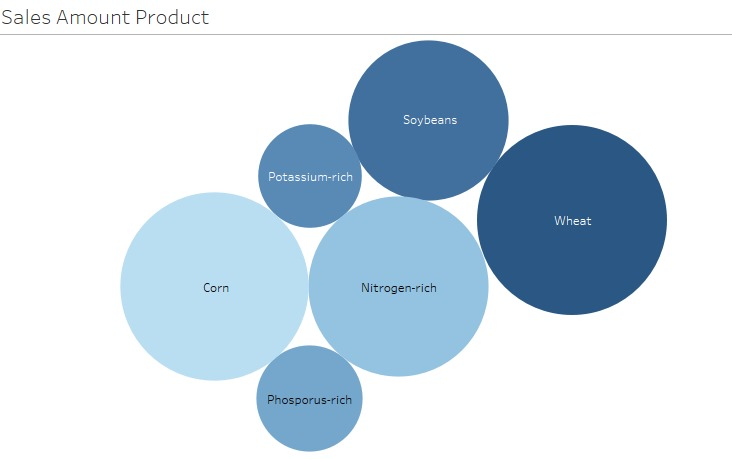

berdasarkan buble chart, corn menjadi komoditas paling banyak penjualannya

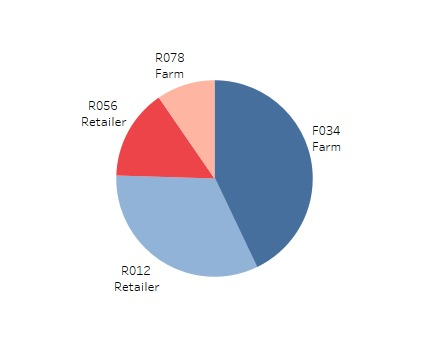

dan dari visual pie chart diatas, dilihat bahwa F034 Farm mempunyai jumlah pelanggan paling banyak dibanding R012 Retailer, R056 Retailer, dan R078 Farm dalam komoditas corn.

##2. Proporsi total penjualan menurut jenis pelanggan untuk setiap bulan dalam setahun. Visualisasi ini harus menyoroti tren musiman penjualan di seluruh jenis pelanggan.

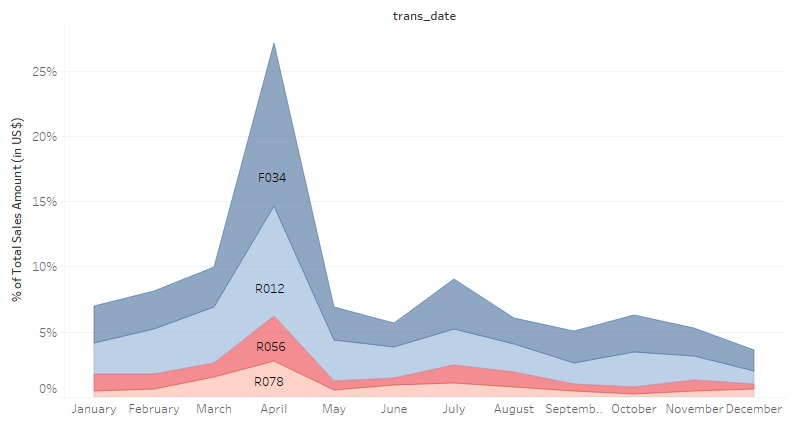

Visualisasi di atas menunjukkan bahwa pelanggan dengan ID F034 mencatatkan jumlah pembelian tertinggi dibandingkan dengan pelanggan lainnya. Selain itu, terdapat lonjakan signifikan dalam jumlah pembelian yang terjadi setiap bulan pada bulan April, yang konsisten terlihat di semua kelompok pelanggan.

## 3. Kinerja penjualan dari tiga perwakilan penjualan teratas selama periode pelaporan tiga tahun. Sertakan penanda untuk perubahan atau peristiwa signifikan yang mungkin berdampak pada kinerja penjualan mereka.

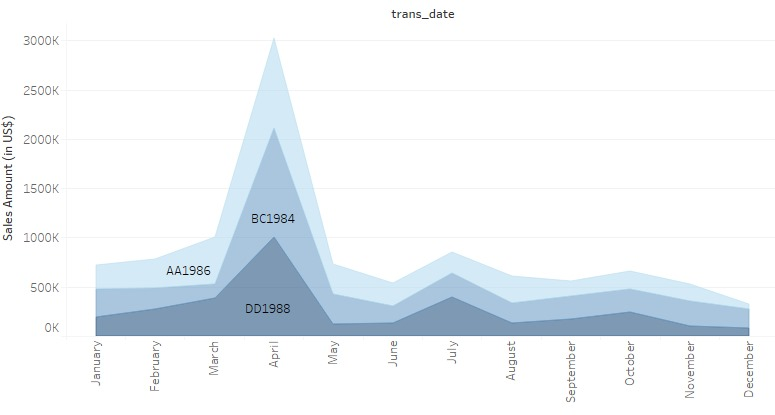

Dari visualisasi ini, terlihat bahwa penjualan mencapai puncaknya pada bulan April, terutama pada kategori BC1984, yang mendominasi dengan penjualan melebihi 2,5 juta dollar. Kategori DD1988 juga menunjukkan kenaikan signifikan di bulan yang sama, namun tidak setinggi BC1984. Selain itu, kategori AA1986 mengalami kenaikan pada bulan Maret dan sedikit menurun pada bulan April.

Setelah puncak di bulan April, jumlah penjualan untuk ketiga kategori mengalami penurunan yang stabil dan tetap rendah hingga akhir tahun, dengan sedikit peningkatan di bulan Agustus dan Oktober.

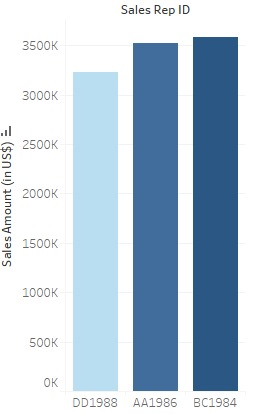

Sales Rep BC1984 dan AA1986 memiliki total penjualan yang hampir sama, sedikit di atas 3,5 juta dollar, sementara DD1988 memiliki total penjualan yang sedikit lebih rendah, mendekati 3,3 juta dollar. Grafik ini menunjukkan bahwa BC1984 dan AA1986 adalah dua sales dengan kinerja penjualan tertinggi, sedangkan DD1988 berada sedikit di bawah mereka dalam hal pencapaian penjualan.

##2. Analisys dan Pelaporan

Selama tiga tahun terakhir (2021-2023), penjualan tertinggi dicapai oleh produk jagung dengan ID produk S2020. Pembeli utama adalah pelanggan tipe “Farm” dari Illinois, yang berkontribusi besar pada total penjualan sehingga dianggap sebagai pelanggan utama. Di urutan kedua, pelanggan bertipe “Retailer” dari Iowa juga termasuk pelanggan besar karena kontribusinya yang signifikan.

Dalam hal performa perwakilan penjualan (sales representative), pengelompokan berdasarkan SalesRepID memudahkan pemantauan kinerja harian mereka. Dari analisis ini, tiga sales terbaik berhasil diidentifikasi: Cody Clark dengan total penjualan tertinggi sebesar 3,585,400, disusul oleh Alex Adams dengan 3,522,300, dan Drew Davis dengan 3,223,900.

Dari bubble chart, komoditas jagung menempati posisi sebagai produk yang paling banyak terjual. Visualisasi melalui pie chart juga mengungkapkan bahwa pelanggan dengan ID F034 (Farm) memiliki jumlah pelanggan terbesar dibandingkan tipe pelanggan lainnya seperti R012, R056 (Retailer), dan R078 (Farm). Tren penjualan menunjukkan lonjakan pembelian yang signifikan di bulan April untuk semua kelompok pelanggan.

Selanjutnya, Sales Rep BC1984(cody clark) menunjukkan performa penjualan tertinggi di bulan April, mencapai lebih dari 2,5 juta.Selain itu DD1988(drew davis) juga mengalami kenaikan pada bulan yang sama, meskipun tidak setinggi BC1984, sementara AA1986(alex adams) mengalami kenaikan pada bulan Maret dengan sedikit penurunan di April. Setelah puncak di bulan April,cenderung menurun secara stabil hingga akhir tahun, dengan sedikit peningkatan di bulan Agustus dan Oktober.

Di antara para perwakilan penjualan, kategori BC1984(cody clark) dan AA1986(alex adams) menempati posisi teratas dengan total penjualan sedikit di atas 3,5 juta, sedangkan kategori DD1988(drew davis) sedikit di bawahnya dengan total penjualan mendekati 3,3 juta.

# **Bagian B**

##1. Buat model untuk memprediksi jumlah tagihan kartu kredit menggunakan variabel di dalam kumpulan data. Anda bebas menggunakan variabel apa pun yang tersedia di dataset (kami sarankan menggunakan data numerik). Apakah Anda mampu membuat model yang akurat dan andal? Variabel manakah yang (atau tidak) relevan dalam memprediksi jumlah tagihan kartu kredit?











In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

### Data Loading

In [ ]:
df = pd.read_excel('fraud.xlsx')

### EDA (Exploratory Data Analysis)

In [ ]:
df.head(10)

trans_date_trans_time                          merchant        category  \
0   2019-04-01 00:58:00  "Stokes, Christiansen and Sipes"     grocery_net   
1   2019-04-01 15:06:00                      Predovic Inc    shopping_net   
2   2019-04-01 22:37:00                   Wisozk and Sons        misc_pos   
3   2019-04-01 23:06:00                    Murray-Smitham     grocery_pos   
4   2019-04-01 23:59:00                        Friesen Lt  health_fitness   
5   2019-05-01 03:15:00     "Raynor, Reinger and Hagenes"   gas_transport   
6   2019-05-01 03:21:00                    Heller-Langosh   gas_transport   
7   2019-05-01 11:31:00                     Padberg-Welch     grocery_pos   
8   2019-05-01 18:03:00                 McGlynn-Heathcote        misc_net   
9   2019-05-01 22:02:00                   Dooley-Thompson        misc_net   

      amt      city state      lat      long  city_pop  \
0   14.37     Wales    AK  64.7556 -165.6723       145   
1  966.11     Wales    AK  64.7556 -165.6723       145   
2   49.61     Wales    AK  64.7556 -165.6723       145   
3  295.26     Wales    AK  64.7556 -165.6723       145   
4   18.17     Wales    AK  64.7556 -165.6723       145   
5   20.45     Wales    AK  64.7556 -165.6723       145   
6   18.19     Wales    AK  64.7556 -165.6723       145   
7  367.29  Browning    MO  40.0290  -93.1607       602   
8  768.15     Wales    AK  64.7556 -165.6723       145   
9  849.49     Wales    AK  64.7556 -165.6723       145   

                          job                  dob  \
0  "Administrator, education"  1939-09-11 00:00:00   
1  "Administrator, education"  1939-09-11 00:00:00   
2  "Administrator, education"  1939-09-11 00:00:00   
3  "Administrator, education"  1939-09-11 00:00:00   
4  "Administrator, education"  1939-09-11 00:00:00   
5  "Administrator, education"  1939-09-11 00:00:00   
6  "Administrator, education"  1939-09-11 00:00:00   
7              Cytogeneticist           14-07-1954   
8  "Administrator, education"  1939-09-11 00:00:00   
9  "Administrator, education"  1939-09-11 00:00:00   

                          trans_num  merch_lat  merch_long is_fraud  
0  a3806e984cec6ac0096d8184c64ad3a1  65.654142 -164.722603        1  
1  a59185fe1b9ccf21323f581d7477573f  65.468863 -165.473127        1  
2  86ba3a888b42cd3925881fa34177b4e0  65.347667 -165.914542        1  
3  3a068fe1d856f0ecedbed33e4b5f4496  64.445035 -166.080207        1  
4  891cdd1191028759dc20dc224347a0ff  65.447094 -165.446843        1  
5  ef010a5f4f570d306a050a368ee2729d  64.088838 -165.104078        1  
6  8e2d2fae5319d31c887dddbc70627ac4  63.917785 -165.827621        1  
7  5fbe827807ec9f557f6242bb48db0e51  39.167065  -93.705245        1  
8  fba83e0a3adb530251295ab72a96b719  64.623325 -166.403973        1  
9  b87c92d4824758e704da572891697fed  65.266065 -164.865352        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [ ]:
print(df.describe())

                amt           lat          long      city_pop     merch_lat  \
count  14446.000000  14446.000000  14446.000000  1.444600e+04  14446.000000   
mean     124.430073     39.787692   -110.874225  1.065370e+05     39.787991   
std      231.352587      5.317039     12.985813  2.902916e+05      5.360593   
min        1.000000     20.027100   -165.672300  4.600000e+01     19.032689   
25%       12.080000     36.715400   -120.415800  4.930000e+02     36.794655   
50%       51.520000     39.666200   -111.098500  1.645000e+03     39.620953   
75%      101.030000     41.940400   -101.136000  3.543900e+04     42.275740   
max     3261.470000     66.693300    -89.628700  2.383912e+06     67.510267   

         merch_long  
count  14446.000000  
mean    -110.874892  
std       12.995596  
min     -166.670685  
25%     -120.146253  
50%     -111.192629  
75%     -100.446822  
max      -88.646366  


In [ ]:
len(df['city'].unique())

176

In [ ]:
df['city'].unique()

array(['Wales', 'Browning', 'Ravenna', 'San Jose', 'Westerville',
       'Thompson', 'Parker Dam', 'San Diego', 'Centerview', 'Vacaville',
       'La Grande', 'Port Costa', 'Meadville', 'Alva', 'Lowell',
       'Albuquerque', 'Lamy', 'Hubbell', 'Fort Washakie', 'Saint Louis',
       'Kansas City', 'Arnold', 'Mesa', 'Daly City', 'Lonetree', 'Napa',
       'Kaktovik', 'Coulee Dam', 'Aurora', 'Utica', 'Roseland', 'Newhall',
       'Fields Landing', 'June Lake', 'Eugene', 'Blairsden-Graeagle',
       'Pueblo', 'Campbell', 'Moab', 'Tomales', 'Red Cliff', 'Downey',
       'Smith River', 'Riverton', 'Conway', 'Syracuse', 'Grenada', 'Jelm',
       'Unionville', 'Scotts Mills', 'Cardwell', 'Manley', 'Lagrange',
       'American Fork', 'Rock Springs', 'Tekoa', 'Independence',
       'Sun City', 'Arvada', 'Williamsburg', 'Monitor', 'Sacramento',
       'Claremont', 'Hawthorne', 'Valentine', 'Matthews', 'Helm', 'Kent',
       'Glendale', 'Humboldt', 'Colorado Springs', 'Fiddletown', 'Omaha',
     

In [ ]:
df['is_fraud'] = df['is_fraud'].apply(lambda x: int(str(x)[0]) if isinstance(x, str) and '"' in x else x)
df['is_fraud'].value_counts()

is_fraud
0    12601
1     1845
Name: count, dtype: int64

In [ ]:
fig = px.histogram(df,
                   x='amt',
                   nbins=30,
                   title='Distribution of Amt')
fig.show()

In [ ]:
fig = px.box(df,
             y='amt',
             title='Distribution of  Amt')
fig.show()

In [ ]:
fig = px.box(df,
             y='city_pop',
             title='Distribution of  City Pop')
fig.show()

In [ ]:
fig = px.bar(df, x='category',
             y='amt', title='Amt by Category')
fig.show()

In [ ]:
fig = px.bar(df, x='state',
             y='amt', title='Amt by State')
fig.show()

In [ ]:
fig = px.scatter(df,
                 x='is_fraud', y='amt', trendline='ols',
                 title='Total Price vs Number of Customers')
fig.show()

Berdasarkan EDA yang di lakukan belum ditemukan fitur mana saja yang relevan terhadap target.

In [ ]:
df[df['amt']==1]

trans_date_trans_time                           merchant      category  \
4769      28-12-2020 11:51  "Altenwerth, Cartwright and Koss"  shopping_net   

      amt     city state      lat      long  city_pop  \
4769  1.0  Freedom    WY  43.0172 -111.0292       471   

                              job                  dob  \
4769  "Education officer, museum"  1967-02-08 00:00:00   

                             trans_num  merch_lat  merch_long  is_fraud  
4769  5849eada9763deed0c157189d2a0d4a3  42.398985 -110.409886         0

In [ ]:
df[df['amt']==3261.470000]

trans_date_trans_time    merchant category      amt        city state  \
5148      28-12-2020 18:44  Turner LLC   travel  3261.47  Mound City    MO   

          lat     long  city_pop        job         dob  \
5148  40.1362 -95.2138      1631  Architect  20-01-1953   

                             trans_num  merch_lat  merch_long  is_fraud  
5148  b5ea3972079963499adf291e2695f317  40.506225  -95.666991         0

In [ ]:
df[df['job']=='Architect']

trans_date_trans_time                        merchant        category  \
1547       13-09-2020 22:23                     Hyatt-Blick          travel   
1548       13-09-2020 22:34    "Stehr, Jewess and Schimmel"        misc_net   
1549       13-09-2020 22:40                     Haley Group        misc_pos   
1550       13-09-2020 23:29                         Jast Lt    shopping_net   
1551       13-09-2020 23:39  "Mosciski, Gislason and Mertz"     grocery_pos   
...                     ...                             ...             ...   
13904      20-01-2019 20:15                    Bins-Tillman   entertainment   
14285      21-01-2019 18:12                       Haag-Blan     food_dining   
14348      21-01-2019 21:06                  Mosciski Group          travel   
14422      21-01-2019 23:36    "Hyatt, Russel and Gleichne"  health_fitness   
14425      21-01-2019 23:41                   Abbott-Steube   personal_care   

          amt        city state      lat     long  city_pop        job  \
1547     8.49  Mound City    MO  40.1362 -95.2138      1631  Architect   
1548   710.45  Mound City    MO  40.1362 -95.2138      1631  Architect   
1549    48.95  Mound City    MO  40.1362 -95.2138      1631  Architect   
1550   995.71  Mound City    MO  40.1362 -95.2138      1631  Architect   
1551   344.55  Mound City    MO  40.1362 -95.2138      1631  Architect   
...       ...         ...   ...      ...      ...       ...        ...   
13904   96.38  Mound City    MO  40.1362 -95.2138      1631  Architect   
14285   11.93  Mound City    MO  40.1362 -95.2138      1631  Architect   
14348    3.20  Mound City    MO  40.1362 -95.2138      1631  Architect   
14422   29.23  Mound City    MO  40.1362 -95.2138      1631  Architect   
14425   40.16  Mound City    MO  40.1362 -95.2138      1631  Architect   

              dob                         trans_num  merch_lat  merch_long  \
1547   20-01-1953  26e4d9d3b7702dfbec180c125c5ae463  40.191854  -94.892174   
1548   20-01-1953  7e5c4675e1f87be74da84c5b1357026c  39.651394  -96.089124   
1549   20-01-1953  f10b9a013d526f84742136c79c7c82c6  40.554380  -94.911825   
1550   20-01-1953  0555a2e7f6d1fedbe35740c2b421908f  40.750528  -95.970518   
1551   20-01-1953  385ec05292cb90d2295cca54825e3ad5  39.442517  -94.706316   
...           ...                               ...        ...         ...   
13904  20-01-1953  bbb485b297bcbc88f36aeed09817994d  39.711133  -94.404426   
14285  20-01-1953  534b589304151430426c7405906c4601  40.005220  -94.499090   
14348  20-01-1953  2d5e24c7fed23e6ebb65a87d4be55fc8  39.878717  -96.183200   
14422  20-01-1953  c84e3e8b16616c5e02963fd79b95faeb  39.854913  -95.781054   
14425  20-01-1953  9c5e0e43739e24d36ef222a468492539  39.468010  -95.448705   

       is_fraud  
1547          1  
1548          1  
1549          1  
1550          1  
1551          1  
...         ...  
13904         0  
14285         0  
14348         0  
14422         0  
14425         0  

[124 rows x 15 columns]

In [ ]:
df

trans_date_trans_time                          merchant        category  \
0       2019-04-01 00:58:00  "Stokes, Christiansen and Sipes"     grocery_net   
1       2019-04-01 15:06:00                      Predovic Inc    shopping_net   
2       2019-04-01 22:37:00                   Wisozk and Sons        misc_pos   
3       2019-04-01 23:06:00                    Murray-Smitham     grocery_pos   
4       2019-04-01 23:59:00                        Friesen Lt  health_fitness   
...                     ...                               ...             ...   
14441      22-01-2019 00:37                      Hudson-Grady    shopping_pos   
14442      22-01-2019 00:41    "Nienow, Ankunding and Collie"        misc_pos   
14443      22-01-2019 00:42                  Pacocha-O'Reilly     grocery_pos   
14444      22-01-2019 00:48     "Bins, Balistreri and Beatty"    shopping_pos   
14445      22-01-2019 00:55                Daugherty-Thompson     food_dining   

          amt        city state      lat      long  city_pop  \
0       14.37       Wales    AK  64.7556 -165.6723       145   
1      966.11       Wales    AK  64.7556 -165.6723       145   
2       49.61       Wales    AK  64.7556 -165.6723       145   
3      295.26       Wales    AK  64.7556 -165.6723       145   
4       18.17       Wales    AK  64.7556 -165.6723       145   
...       ...         ...   ...      ...       ...       ...   
14441  122.00      Athena    OR  45.8289 -118.4971      1302   
14442    9.07    Gardiner    OR  43.7857 -124.1437       260   
14443  104.84        Alva    WY  44.6873 -104.4414       110   
14444  268.16       Wales    AK  64.7556 -165.6723       145   
14445   50.09  Unionville    MO  40.4815  -92.9951      3805   

                                     job                  dob  \
0             "Administrator, education"  1939-09-11 00:00:00   
1             "Administrator, education"  1939-09-11 00:00:00   
2             "Administrator, education"  1939-09-11 00:00:00   
3             "Administrator, education"  1939-09-11 00:00:00   
4             "Administrator, education"  1939-09-11 00:00:00   
...                                  ...                  ...   
14441                             Dealer           18-10-1976   
14442            "Engineer, maintenance"  1956-01-09 00:00:00   
14443  "Administrator, local government"           16-05-1973   
14444         "Administrator, education"  1939-09-11 00:00:00   
14445     "Investment banker, corporate"           15-09-1950   

                              trans_num  merch_lat  merch_long  is_fraud  
0      a3806e984cec6ac0096d8184c64ad3a1  65.654142 -164.722603         1  
1      a59185fe1b9ccf21323f581d7477573f  65.468863 -165.473127         1  
2      86ba3a888b42cd3925881fa34177b4e0  65.347667 -165.914542         1  
3      3a068fe1d856f0ecedbed33e4b5f4496  64.445035 -166.080207         1  
4      891cdd1191028759dc20dc224347a0ff  65.447094 -165.446843         1  
...                                 ...        ...         ...       ...  
14441  699a4c06b22711bf3e0d8ef91232d356  46.442439 -118.524214         0  
14442  080d620d24815c7d6c637cf0b71dde8e  42.901265 -124.995317         0  
14443  3c346c8cd627c5fe3ed57430db2e9ae7  45.538062 -104.542117         0  
14444  e66ffcc95ba7fc490486242af1205d04  64.081462 -165.898698         0  
14445  65e7370f473f9b9d75796c8033a7c929  40.387243  -92.224871         0  

[14446 rows x 15 columns]

In [ ]:
def convert_datetime(value):
    if pd.isna(value):
        return pd.NaT
    for fmt in ('%Y-%m-%d %H:%M:%S', '%d-%m-%Y %H:%M','%d-%m-%Y'):
        try:
            return pd.to_datetime(value, format=fmt)
        except ValueError:
            continue
    print(f"Gagal mengonversi: {value}")
    return pd.NaT

df['trans_date_trans_time'] = df['trans_date_trans_time'].apply(convert_datetime)


Melakukan identifikasi data duplikat dengan menggunakan kolom 'trans_num' sebagai acuan. Hal ini dikarenakan 'trans_num' merupakan variabel yang memiliki nilai unik, sehingga tidak seharusnya terdapat nilai yang sama dalam kolom tersebut.

In [ ]:
duplicates = df[df.duplicated(subset='trans_num', keep=False)]

In [ ]:
duplicates

trans_date_trans_time                          merchant        category  \
0       2019-04-01 00:58:00  "Stokes, Christiansen and Sipes"     grocery_net   
1       2019-04-01 15:06:00                      Predovic Inc    shopping_net   
2       2019-04-01 22:37:00                   Wisozk and Sons        misc_pos   
3       2019-04-01 23:06:00                    Murray-Smitham     grocery_pos   
4       2019-04-01 23:59:00                        Friesen Lt  health_fitness   
...                     ...                               ...             ...   
13261   2019-01-18 14:38:00                    Shanahan-Lehne   personal_care   
13372   2019-01-18 22:06:00                         Beier LLC   entertainment   
13376   2019-01-18 22:12:00               Bartoletti and Sons   personal_care   
13392   2019-01-18 23:16:00                 Ankunding-Carroll          travel   
13396   2019-01-18 23:31:00                      Wilkinson Lt   entertainment   

          amt      city state      lat      long  city_pop  \
0       14.37     Wales    AK  64.7556 -165.6723       145   
1      966.11     Wales    AK  64.7556 -165.6723       145   
2       49.61     Wales    AK  64.7556 -165.6723       145   
3      295.26     Wales    AK  64.7556 -165.6723       145   
4       18.17     Wales    AK  64.7556 -165.6723       145   
...       ...       ...   ...      ...       ...       ...   
13261   21.54  Thompson    UT  38.9999 -109.6150        46   
13372  528.98  Thompson    UT  38.9999 -109.6150        46   
13376   21.23  Thompson    UT  38.9999 -109.6150        46   
13392    9.33  Thompson    UT  38.9999 -109.6150        46   
13396  386.91  Thompson    UT  38.9999 -109.6150        46   

                              job                  dob  \
0      "Administrator, education"  1939-09-11 00:00:00   
1      "Administrator, education"  1939-09-11 00:00:00   
2      "Administrator, education"  1939-09-11 00:00:00   
3      "Administrator, education"  1939-09-11 00:00:00   
4      "Administrator, education"  1939-09-11 00:00:00   
...                           ...                  ...   
13261        "Surveyor, minerals"           23-04-1987   
13372        "Surveyor, minerals"           23-04-1987   
13376        "Surveyor, minerals"           23-04-1987   
13392        "Surveyor, minerals"           23-04-1987   
13396        "Surveyor, minerals"           23-04-1987   

                              trans_num  merch_lat  merch_long  is_fraud  
0      a3806e984cec6ac0096d8184c64ad3a1  65.654142 -164.722603         1  
1      a59185fe1b9ccf21323f581d7477573f  65.468863 -165.473127         1  
2      86ba3a888b42cd3925881fa34177b4e0  65.347667 -165.914542         1  
3      3a068fe1d856f0ecedbed33e4b5f4496  64.445035 -166.080207         1  
4      891cdd1191028759dc20dc224347a0ff  65.447094 -165.446843         1  
...                                 ...        ...         ...       ...  
13261  ce3b2734ce646ef6a47b3484a8e043e5  38.211376 -109.986757         1  
13372  3417f366e2e1d5dd25a3a89a3aae9f3d  39.164469 -109.933543         1  
13376  2df9fa2d0e508ed2a83aa3ac6f4b5d5a  38.998205 -110.005615         1  
13392  a0ed41246d201717db7250fa2375c73b  39.230640 -108.990363         1  
13396  48dcc21bdef98405171a831d70b463c8  39.262556 -109.656927         1  

[126 rows x 15 columns]

In [ ]:

df = df.drop_duplicates(subset='trans_num', keep='first')

In [ ]:
df[df['trans_num']=='ce3b2734ce646ef6a47b3484a8e043e5']

trans_date_trans_time        merchant       category    amt      city  \
58   2019-01-18 14:38:00  Shanahan-Lehne  personal_care  21.54  Thompson   

   state      lat     long  city_pop                   job         dob  \
58    UT  38.9999 -109.615        46  "Surveyor, minerals"  23-04-1987   

                           trans_num  merch_lat  merch_long  is_fraud  
58  ce3b2734ce646ef6a47b3484a8e043e5  38.211376 -109.986757         1

In [ ]:
len(df['trans_num'])

14383

### Feature Engineering

In [ ]:
from geopy.distance import geodesic

def calculate_distance(row):
    return geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers

df['jarak_lok_pembelian_dan_merch'] = df.apply(calculate_distance, axis=1)


<ipython-input-1179-a0020d9c9568>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['day_of_month'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year


<ipython-input-1180-6d1f72d3d023>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1180-6d1f72d3d023>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1180-6d1f72d3d023>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1180

In [ ]:
df['age'] = df['trans_date_trans_time'].dt.year - pd.to_datetime(df['dob']).dt.year

<ipython-input-1181-59c391b90ef5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df = df.drop(['trans_date_trans_time','merchant','trans_num','dob'],axis=1)

In [ ]:
label_encoder = LabelEncoder()
label = ['category','job','city','state','city_pop']
for i in label:
  df[i] = label_encoder.fit_transform(df[i])



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   category                       14383 non-null  int64  
 1   amt                            14383 non-null  float64
 2   city                           14383 non-null  int64  
 3   state                          14383 non-null  int64  
 4   lat                            14383 non-null  float64
 5   long                           14383 non-null  float64
 6   city_pop                       14383 non-null  int64  
 7   job                            14383 non-null  int64  
 8   merch_lat                      14383 non-null  float64
 9   merch_long                     14383 non-null  float64
 10  is_fraud                       14383 non-null  int64  
 11  jarak_lok_pembelian_dan_merch  14383 non-null  float64
 12  hour                           14383 non-null  int3

In [ ]:
df

category     amt  city  state      lat      long  city_pop  job  \
0             3   14.37   166      0  64.7556 -165.6723        15    1   
1            11  966.11   166      0  64.7556 -165.6723        15    1   
2             9   49.61   166      0  64.7556 -165.6723        15    1   
3             4  295.26   166      0  64.7556 -165.6723        15    1   
4             5   18.17   166      0  64.7556 -165.6723        15    1   
...         ...     ...   ...    ...      ...       ...       ...  ...   
14441        12  122.00     8      9  45.8289 -118.4971        76   78   
14442         9    9.07    48      9  43.7857 -124.1437        25   16   
14443         4  104.84     2     12  44.6873 -104.4414         8    2   
14444        12  268.16   166      0  64.7556 -165.6723        15    1   
14445         1   50.09   160      6  40.4815  -92.9951       102   21   

       merch_lat  merch_long  is_fraud  jarak_lok_pembelian_dan_merch  hour  \
0      65.654142 -164.722603         1                     109.602464     0   
1      65.468863 -165.473127         1                      80.073191    15   
2      65.347667 -165.914542         1                      66.989556    22   
3      64.445035 -166.080207         1                      39.752058    23   
4      65.447094 -165.446843         1                      77.822083    23   
...          ...         ...       ...                            ...   ...   
14441  46.442439 -118.524214         0                      68.229471     0   
14442  42.901265 -124.995317         0                     120.096145     0   
14443  45.538062 -104.542117         0                      94.880148     0   
14444  64.081462 -165.898698         0                      75.943368     0   
14445  40.387243  -92.224871         0                      66.186758     0   

       day_of_week  day_of_month  month  year  age  
0                0             1      4  2019   80  
1                0             1      4  2019   80  
2                0             1      4  2019   80  
3                0             1      4  2019   80  
4                0             1      4  2019   80  
...            ...           ...    ...   ...  ...  
14441            1            22      1  2019   43  
14442            1            22      1  2019   63  
14443            1            22      1  2019   46  
14444            1            22      1  2019   80  
14445            1            22      1  2019   69  

[14383 rows x 18 columns]

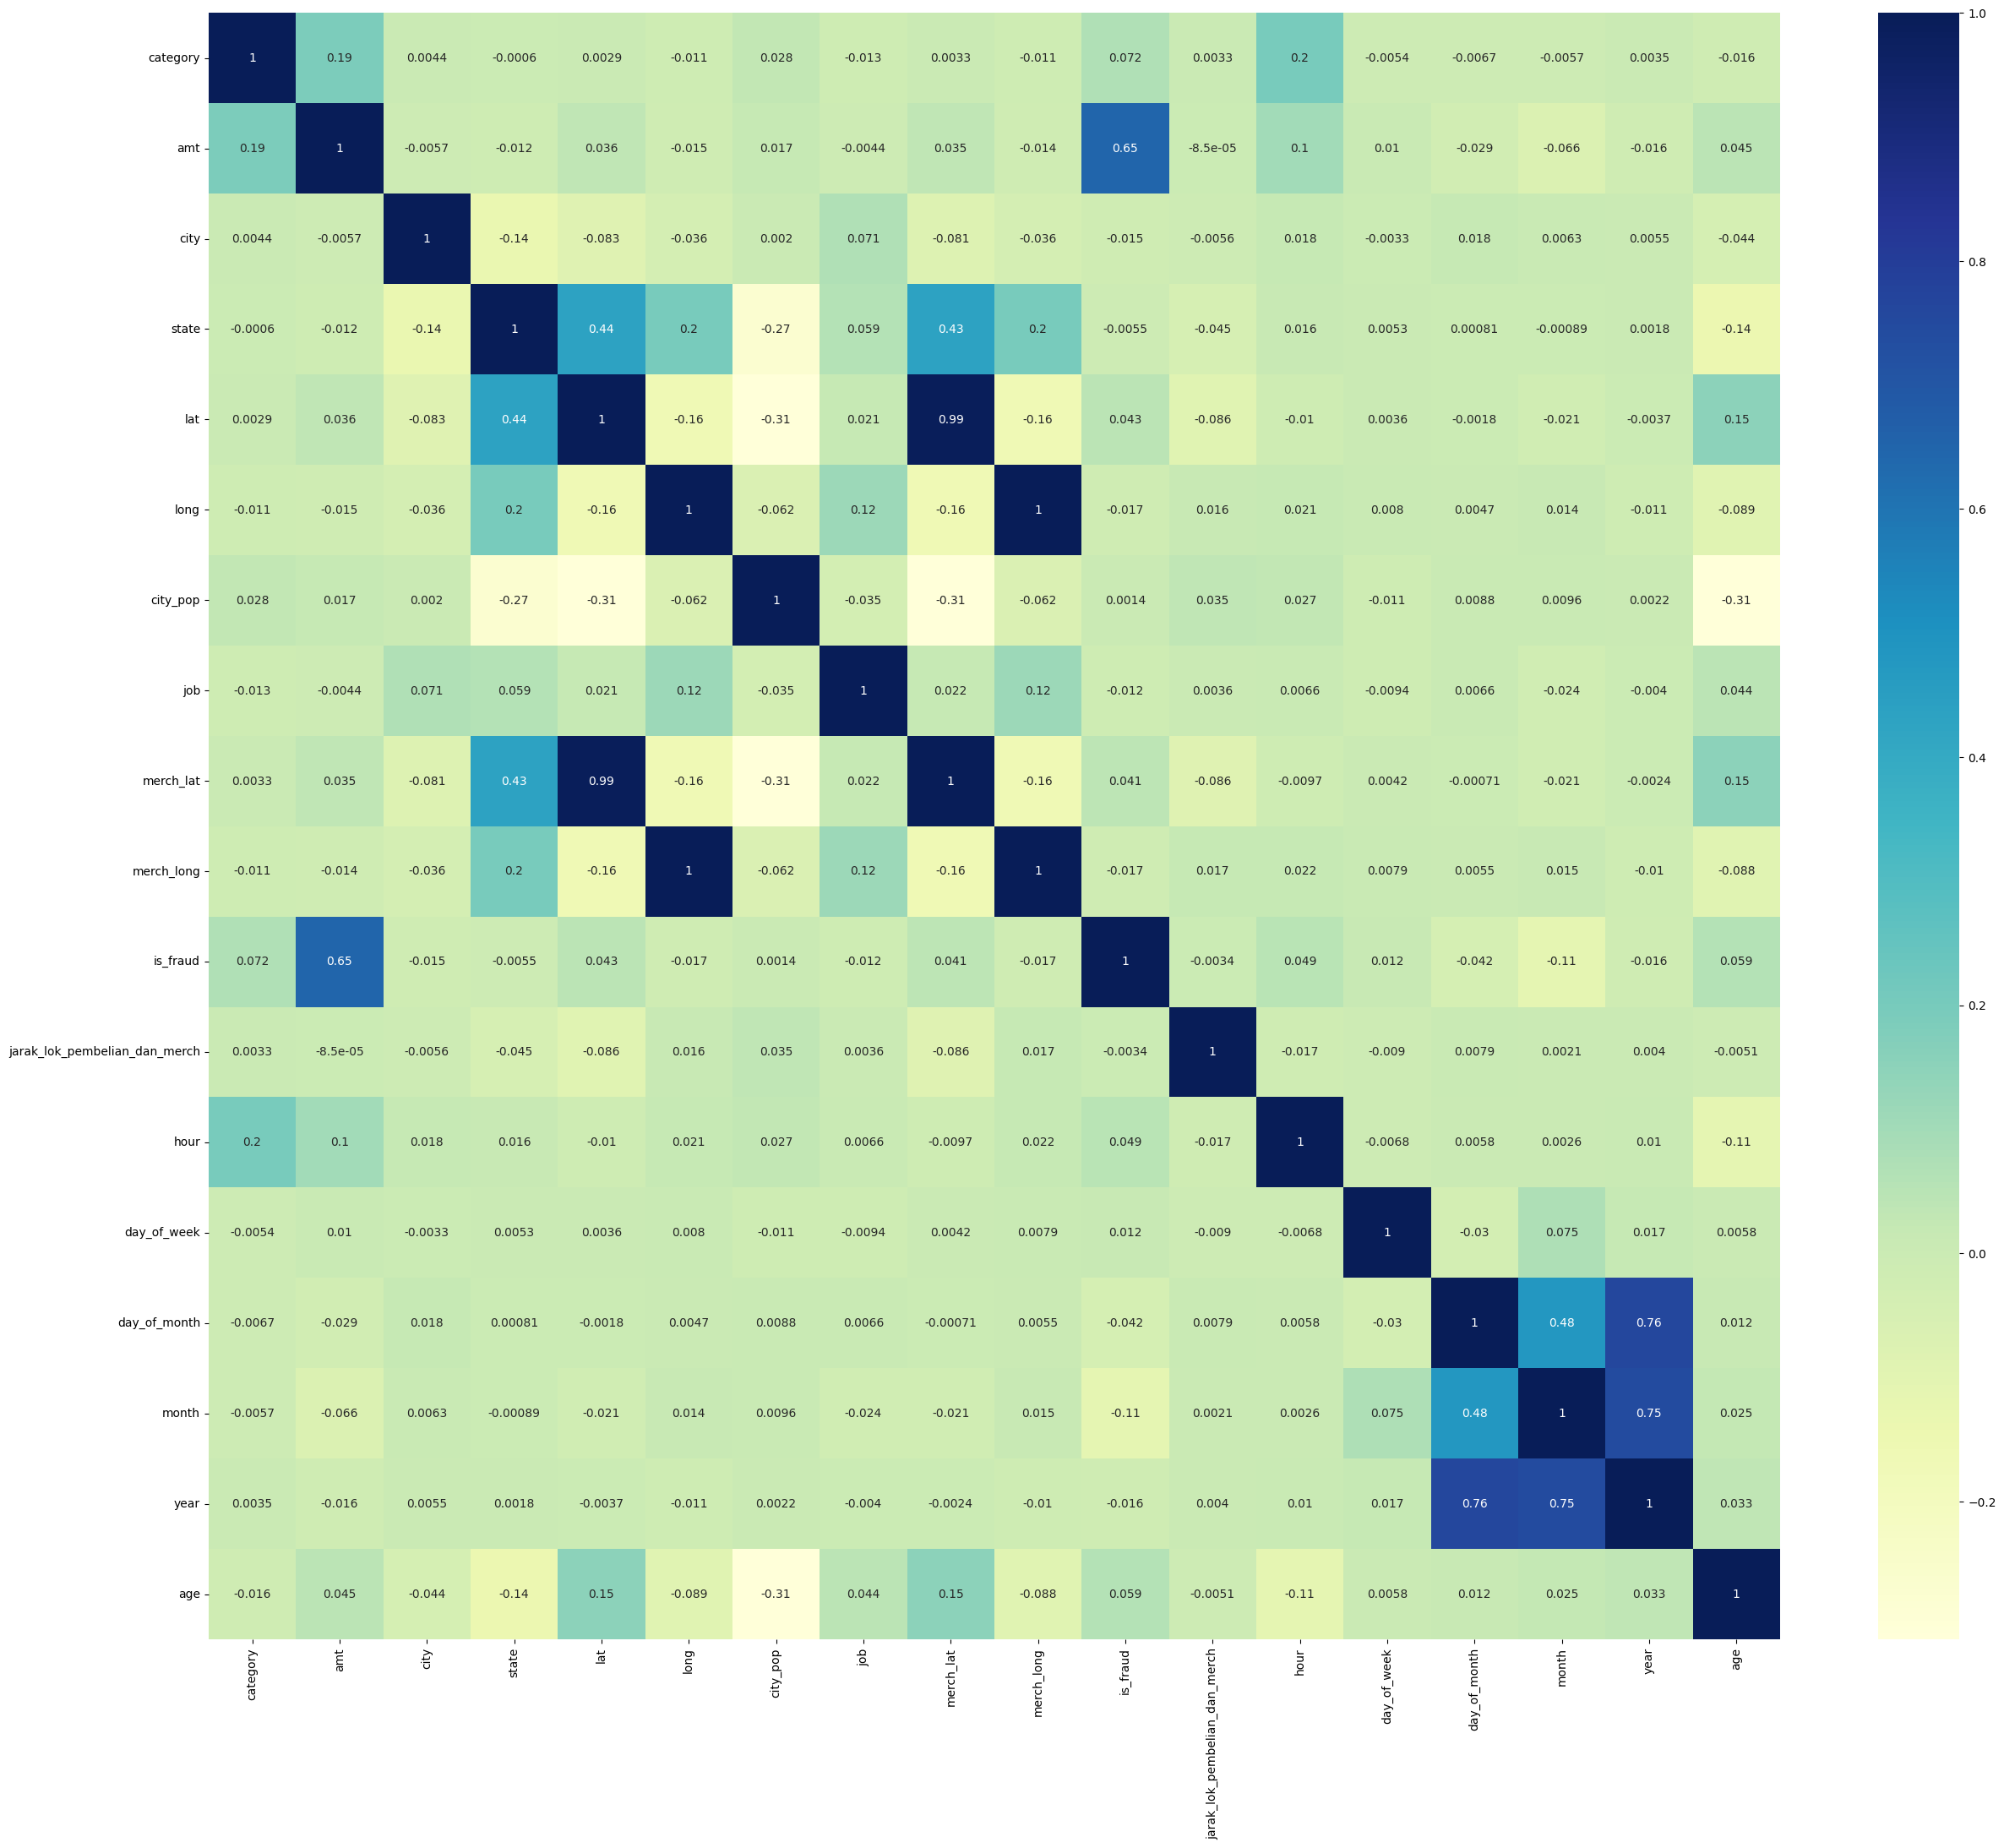

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Setelah dilihat dari corelation matrixnya, fitur 'is_fraud' mempunyai korelasi paling tinggi dengan fitur target atau fitur 'amt'

In [ ]:
df = df.drop(['jarak_lok_pembelian_dan_merch','state','lat','long','job','day_of_week','day_of_month','age'], axis=1)

In [ ]:
df = df.drop(['city_pop'],axis=1)

In [ ]:
df

category     amt  city  merch_lat  merch_long  is_fraud  hour  month  \
0             3   14.37   166  65.654142 -164.722603         1     0      4   
1            11  966.11   166  65.468863 -165.473127         1    15      4   
2             9   49.61   166  65.347667 -165.914542         1    22      4   
3             4  295.26   166  64.445035 -166.080207         1    23      4   
4             5   18.17   166  65.447094 -165.446843         1    23      4   
...         ...     ...   ...        ...         ...       ...   ...    ...   
14441        12  122.00     8  46.442439 -118.524214         0     0      1   
14442         9    9.07    48  42.901265 -124.995317         0     0      1   
14443         4  104.84     2  45.538062 -104.542117         0     0      1   
14444        12  268.16   166  64.081462 -165.898698         0     0      1   
14445         1   50.09   160  40.387243  -92.224871         0     0      1   

       year  
0      2019  
1      2019  
2      2019  
3      2019  
4      2019  
...     ...  
14441  2019  
14442  2019  
14443  2019  
14444  2019  
14445  2019  

[14383 rows x 9 columns]

Melakukan Normalisasi data menggunakan StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

target_scaler = StandardScaler()

df_scaled = target_scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

Train-Test Split

In [ ]:
X, y = df_scaled.drop(['amt'], axis=1), df_scaled['amt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Modeling

Random Forest Regresor

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=40)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [ ]:
print(f"R2 score: {r2_score(y_test, y_pred_rf)}")

R2 score: 0.750058633077811


In [ ]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")

Mean Absolute Error: 0.22665336568436187


In [ ]:
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred_rf)}")

Root Mean Squared Error: 0.5060550946030847


In [ ]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")

Mean Squared Error: 0.256091758773737


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_rf, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted vs. Actual Amt'))
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Amt',
    xaxis_title='Actual Amt',
    yaxis_title='Amt'
)
fig.show()

XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
model_xgb = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# 7. Evaluasi model
y_pred_xgb = model_xgb.predict(X_test)


In [ ]:
print(f"R2 score: {r2_score(y_test, y_pred_xgb)}")

R2 score: 0.7406562367189911


In [ ]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_xgb)}")

Mean Absolute Error: 0.22944947435742352


In [ ]:
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred_xgb)}")

Root Mean Squared Error: 0.5154857156930912


In [ ]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb)}")

Mean Squared Error: 0.26572552308361846


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_xgb, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted vs. Actual Amt'))
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Amt',
    xaxis_title='Actual Amt',
    yaxis_title='Amt'
)
fig.show()

Catboost Regressor

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor
model_ctb = CatBoostRegressor(
    iterations=150,
    learning_rate=0.1,
    depth=9,
    verbose=0
)

# 4. Melatih model
model_ctb.fit(X, y, eval_set=(X, y), use_best_model=True)

# 5. Prediksi dan evaluasi
y_pred_ctb = model_ctb.predict(X)

In [ ]:
print(f"R2 score: {r2_score(y, y_pred_ctb)}")

R2 score: 0.8364276827770987


In [ ]:
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred_ctb)}")

Mean Absolute Error: 0.20411298502104122


In [ ]:
print(f"Root Mean Squared Error: {root_mean_squared_error(y, y_pred_ctb)}")

Root Mean Squared Error: 0.4044407462446154


In [ ]:
print(f"Mean Squared Error: {mean_squared_error(y, y_pred_ctb)}")

Mean Squared Error: 0.1635723172229014


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred_ctb, mode='markers',
                         marker=dict(color='blue'),
                         name='Actual vs. Predicted'))
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Actual vs. Predicted',
    xaxis_title='Actual Amt',
    yaxis_title='Predicted Amt'
)
fig.show()

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model_ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.001, random_state=42)
model_ada.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)

In [ ]:
print(f"R2 score: {r2_score(y_test, y_pred_ada)}")

R2 score: 0.6859218844307151


In [ ]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ada)}")

Mean Absolute Error: 0.2854957147140923


In [ ]:
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred_ada)}")

Root Mean Squared Error: 0.5672801266684022


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred_ada, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted vs. Actual Amt'))
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Amt',
    xaxis_title='Actual Amt',
    yaxis_title='Amt'
)
fig.show()

### Model yang akurat dan andal
Setelah melatih data dengan beberapa model, CatBoost Regressor terbukti memiliki kinerja paling optimal. Model ini menunjukkan nilai R² score tertinggi sebesar 0,83, serta nilai kesalahan yang paling kecil dibandingkan model lainnya, dengan Mean Absolute Error (MAE) sebesar 0,20, Root Mean Squared Error (RMSE) sebesar 0,16, dan Mean Squared Error (MSE) sebesar 0,40. Hal ini menunjukkan bahwa CatBoost Regressor memiliki tingkat akurasi yang lebih baik dalam memprediksi data pada dataset yang digunakan.

Efektivitas CatBoost Regressor dalam penelitian ini didukung oleh karakteristik dataset, yang lebih banyak mengandung fitur kategorikal dibandingkan fitur kontinu. CatBoost Regressor memiliki keunggulan dalam menangani variabel kategori secara otomatis tanpa memerlukan preprocessing tambahan, sehingga mempermudah proses persiapan data. Selain itu, model ini relatif mudah untuk dioptimalkan (tuning) dan menunjukkan performa yang stabil, bahkan dengan parameter default. CatBoost Regressor juga cenderung lebih efisien dan cepat dibandingkan dengan XGBoost pada beberapa kasus serta mampu menghasilkan model yang tidak mudah mengalami overfitting. Oleh karena itu, model ini sangat sesuai untuk dataset yang memiliki banyak variabel kategori, dengan performa yang unggul untuk berbagai jenis data.



###Variabel yang relevan atau tidak relevan dalam memprediksi jumlah tagihan kartu kredit dapat ditentukan melalui analisis correlation matrix.
Berdasarkan correlation matrix yang ditampilkan pada https://colab.research.google.com/drive/1sazqtoga10VtLk046QvAZIcpTkJllEOy#scrollTo=NwzY6Pda-f2y&line=2&uniqifier=1 , fitur dengan korelasi tertinggi terhadap variabel target (yaitu "amt") adalah variabel is_fraud. Oleh karena itu, fitur is_fraud dipilih sebagai salah satu prediktor dalam model.

Namun, karena jumlah fitur yang relevan dengan korelasi signifikan relatif sedikit, kami memutuskan untuk menambahkan tujuh fitur lain yang memiliki korelasi tertinggi setelah is_fraud. Fitur-fitur tersebut adalah category, city, merch_lat, merch_long, year, month, dan hour. Dengan memasukkan fitur-fitur ini sebagai variabel prediktor, diharapkan model dapat menangkap hubungan yang lebih kuat dan menyeluruh terhadap variabel target.

###2. Buat model clustering dengan tiga (3) cluster menggunakan variabel berikut. Jelaskan karakteristik masing-masing cluster. Dari mana sebagian besar pelanggan Pinjaman 'R Usberasal/berlokasi? Rekomendasi apa yang dapat Anda berikan dari klaster tersebut untukmeningkatkan jumlah pelanggan Loans ‘R Us?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [ ]:
df=pd.read_excel('fraud.xlsx')
df.head()


trans_date_trans_time                          merchant        category  \
0   2019-04-01 00:58:00  "Stokes, Christiansen and Sipes"     grocery_net   
1   2019-04-01 15:06:00                      Predovic Inc    shopping_net   
2   2019-04-01 22:37:00                   Wisozk and Sons        misc_pos   
3   2019-04-01 23:06:00                    Murray-Smitham     grocery_pos   
4   2019-04-01 23:59:00                        Friesen Lt  health_fitness   

      amt   city state      lat      long  city_pop  \
0   14.37  Wales    AK  64.7556 -165.6723       145   
1  966.11  Wales    AK  64.7556 -165.6723       145   
2   49.61  Wales    AK  64.7556 -165.6723       145   
3  295.26  Wales    AK  64.7556 -165.6723       145   
4   18.17  Wales    AK  64.7556 -165.6723       145   

                          job                  dob  \
0  "Administrator, education"  1939-09-11 00:00:00   
1  "Administrator, education"  1939-09-11 00:00:00   
2  "Administrator, education"  1939-09-11 00:00:00   
3  "Administrator, education"  1939-09-11 00:00:00   
4  "Administrator, education"  1939-09-11 00:00:00   

                          trans_num  merch_lat  merch_long is_fraud  
0  a3806e984cec6ac0096d8184c64ad3a1  65.654142 -164.722603        1  
1  a59185fe1b9ccf21323f581d7477573f  65.468863 -165.473127        1  
2  86ba3a888b42cd3925881fa34177b4e0  65.347667 -165.914542        1  
3  3a068fe1d856f0ecedbed33e4b5f4496  64.445035 -166.080207        1  
4  891cdd1191028759dc20dc224347a0ff  65.447094 -165.446843        1

### Data Preprocesing

In [ ]:
df.dropna(inplace=True)
df

trans_date_trans_time                          merchant        category  \
0       2019-04-01 00:58:00  "Stokes, Christiansen and Sipes"     grocery_net   
1       2019-04-01 15:06:00                      Predovic Inc    shopping_net   
2       2019-04-01 22:37:00                   Wisozk and Sons        misc_pos   
3       2019-04-01 23:06:00                    Murray-Smitham     grocery_pos   
4       2019-04-01 23:59:00                        Friesen Lt  health_fitness   
...                     ...                               ...             ...   
14441      22-01-2019 00:37                      Hudson-Grady    shopping_pos   
14442      22-01-2019 00:41    "Nienow, Ankunding and Collie"        misc_pos   
14443      22-01-2019 00:42                  Pacocha-O'Reilly     grocery_pos   
14444      22-01-2019 00:48     "Bins, Balistreri and Beatty"    shopping_pos   
14445      22-01-2019 00:55                Daugherty-Thompson     food_dining   

          amt        city state      lat      long  city_pop  \
0       14.37       Wales    AK  64.7556 -165.6723       145   
1      966.11       Wales    AK  64.7556 -165.6723       145   
2       49.61       Wales    AK  64.7556 -165.6723       145   
3      295.26       Wales    AK  64.7556 -165.6723       145   
4       18.17       Wales    AK  64.7556 -165.6723       145   
...       ...         ...   ...      ...       ...       ...   
14441  122.00      Athena    OR  45.8289 -118.4971      1302   
14442    9.07    Gardiner    OR  43.7857 -124.1437       260   
14443  104.84        Alva    WY  44.6873 -104.4414       110   
14444  268.16       Wales    AK  64.7556 -165.6723       145   
14445   50.09  Unionville    MO  40.4815  -92.9951      3805   

                                     job                  dob  \
0             "Administrator, education"  1939-09-11 00:00:00   
1             "Administrator, education"  1939-09-11 00:00:00   
2             "Administrator, education"  1939-09-11 00:00:00   
3             "Administrator, education"  1939-09-11 00:00:00   
4             "Administrator, education"  1939-09-11 00:00:00   
...                                  ...                  ...   
14441                             Dealer           18-10-1976   
14442            "Engineer, maintenance"  1956-01-09 00:00:00   
14443  "Administrator, local government"           16-05-1973   
14444         "Administrator, education"  1939-09-11 00:00:00   
14445     "Investment banker, corporate"           15-09-1950   

                              trans_num  merch_lat  merch_long is_fraud  
0      a3806e984cec6ac0096d8184c64ad3a1  65.654142 -164.722603        1  
1      a59185fe1b9ccf21323f581d7477573f  65.468863 -165.473127        1  
2      86ba3a888b42cd3925881fa34177b4e0  65.347667 -165.914542        1  
3      3a068fe1d856f0ecedbed33e4b5f4496  64.445035 -166.080207        1  
4      891cdd1191028759dc20dc224347a0ff  65.447094 -165.446843        1  
...                                 ...        ...         ...      ...  
14441  699a4c06b22711bf3e0d8ef91232d356  46.442439 -118.524214        0  
14442  080d620d24815c7d6c637cf0b71dde8e  42.901265 -124.995317        0  
14443  3c346c8cd627c5fe3ed57430db2e9ae7  45.538062 -104.542117        0  
14444  e66ffcc95ba7fc490486242af1205d04  64.081462 -165.898698        0  
14445  65e7370f473f9b9d75796c8033a7c929  40.387243  -92.224871        0  

[14446 rows x 15 columns]

Menghapus data duplicate beedasarkan fitur 'amt'

In [ ]:
duplicates = df[df.duplicated(subset='trans_num', keep=False)]
df = df.drop_duplicates(subset='trans_num', keep='first')

In [ ]:

X = df.drop("amt", axis=1)
y = df["amt"]

df.head()
df_hi = df.copy()

menghapus beberapa fitur

In [ ]:

df = df.drop(['trans_date_trans_time','category','merchant','job','dob','trans_num','is_fraud' ], axis=1)
df

amt        city state      lat      long  city_pop  merch_lat  \
0       14.37       Wales    AK  64.7556 -165.6723       145  65.654142   
1      966.11       Wales    AK  64.7556 -165.6723       145  65.468863   
2       49.61       Wales    AK  64.7556 -165.6723       145  65.347667   
3      295.26       Wales    AK  64.7556 -165.6723       145  64.445035   
4       18.17       Wales    AK  64.7556 -165.6723       145  65.447094   
...       ...         ...   ...      ...       ...       ...        ...   
14441  122.00      Athena    OR  45.8289 -118.4971      1302  46.442439   
14442    9.07    Gardiner    OR  43.7857 -124.1437       260  42.901265   
14443  104.84        Alva    WY  44.6873 -104.4414       110  45.538062   
14444  268.16       Wales    AK  64.7556 -165.6723       145  64.081462   
14445   50.09  Unionville    MO  40.4815  -92.9951      3805  40.387243   

       merch_long  
0     -164.722603  
1     -165.473127  
2     -165.914542  
3     -166.080207  
4     -165.446843  
...           ...  
14441 -118.524214  
14442 -124.995317  
14443 -104.542117  
14444 -165.898698  
14445  -92.224871  

[14383 rows x 8 columns]

### Feature Selection

seleksi fitur menggunakan k-beast

alasan kami menggunakan k-beast karena k-beast adalah metode seleksi fitur yang digunakan untuk memilih fitur-fitur paling relevan dalam model prediksi, terutama pada dataset dengan banyak fitur seperti dataset fraud. Dengan menggabungkan teknik *boosting* dan *kernel*, KBeast dapat menilai pentingnya setiap fitur dan hanya memilih yang paling berkontribusi terhadap hasil prediksi.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split


median_amt = df['amt'].median()
df['target'] = (df['amt'] > median_amt).astype(int)

binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_binned = pd.DataFrame(binner.fit_transform(df[['lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]), columns=['lat', 'long', 'city_pop', 'merch_lat', 'merch_long'])

X = df_binned
y = df['target']

chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

chi2_scores = pd.DataFrame(chi2_selector.scores_, columns=['Chi-Square Score'], index=X.columns)
print(chi2_scores)
print(chi2_scores.sort_values(by='Chi-Square Score', ascending=False))


            Chi-Square Score
lat                 0.001215
long                0.818528
city_pop            0.000009
merch_lat           0.041704
merch_long          0.959160
            Chi-Square Score
merch_long          0.959160
long                0.818528
merch_lat           0.041704
lat                 0.001215
city_pop            0.000009


### Clustering

melakukan clustering dengan single linkage, dan menggunakan fitur amt dan merch long

Beberapa data dengan Hierarchical_Cluster:
          amt  merch_long  Hierarchical_Cluster
0       14.37 -164.722603                     1
1      966.11 -165.473127                     1
2       49.61 -165.914542                     1
3      295.26 -166.080207                     1
4       18.17 -165.446843                     1
...       ...         ...                   ...
14441  122.00 -118.524214                     1
14442    9.07 -124.995317                     1
14443  104.84 -104.542117                     1
14444  268.16 -165.898698                     1
14445   50.09  -92.224871                     1

[14383 rows x 3 columns]

Data yang masuk dalam masing-masing cluster:

Cluster 1:
      trans_date_trans_time                          merchant        category  \
0       2019-04-01 00:58:00  "Stokes, Christiansen and Sipes"     grocery_net   
1       2019-04-01 15:06:00                      Predovic Inc    shopping_net   
2       2019-04-01 22:37:00                   Wisozk a

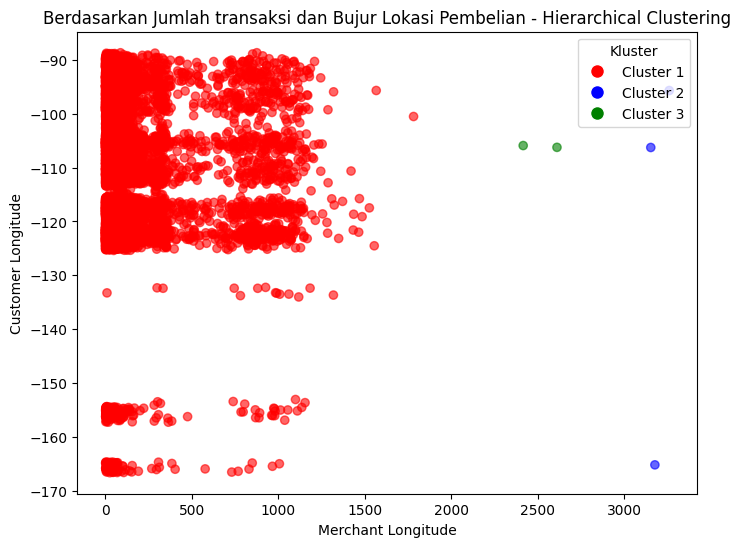

Jumlah data pada setiap cluster Hierarchical Clustering:
Hierarchical_Cluster
1    14378
2        3
3        2
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X_hierarchical = df_hi[['amt', 'merch_long']]

hierarchical = AgglomerativeClustering(n_clusters=3, linkage='single')
df_hi['Hierarchical_Cluster'] = hierarchical.fit_predict(X_hierarchical) + 1


df_hi['color'] = df_hi['Hierarchical_Cluster'].map({1: 'red', 2: 'blue', 3: 'green'})

print("Beberapa data dengan Hierarchical_Cluster:")
print(df_hi[['amt', 'merch_long', 'Hierarchical_Cluster']])

print("\nData yang masuk dalam masing-masing cluster:")
for cluster_num in range(1, 4):
    print(f"\nCluster {cluster_num}:")
    print(df_hi[df_hi['Hierarchical_Cluster'] == cluster_num])


plt.figure(figsize=(8, 6))
plt.scatter(df_hi['amt'], df_hi['merch_long'], c=df_hi['color'], alpha=0.6)

plt.title('Berdasarkan Jumlah transaksi dan Bujur Lokasi Pembelian - Hierarchical Clustering')
plt.xlabel('Merchant Longitude')
plt.ylabel('Customer Longitude')


plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Cluster 1'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 2'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 3')],
    title="Kluster", loc="upper right")

plt.show()


print("Jumlah data pada setiap cluster Hierarchical Clustering:")
print(df_hi['Hierarchical_Cluster'].value_counts())


memunculkan sebaran pembentukan cluster serta menghitung rata rata amt dan merch long

In [ ]:
import folium
import pandas as pd


cluster_data = df_hi[df_hi['Hierarchical_Cluster'] == 1]
center_lat = cluster_data['lat'].mean()
center_long = cluster_data['long'].mean()


m = folium.Map(location=[center_lat, center_long], zoom_start=6)


for _, row in cluster_data.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Lat: {row['lat']} | Long: {row['long']}",
        icon=folium.Icon(color=row['color'])
    ).add_to(m)

m


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
value = df_hi['Hierarchical_Cluster'].value_counts()
print(value)
cluster_means = df_hi.groupby('Hierarchical_Cluster')[['amt', 'merch_long']].mean()
print("Rata-rata untuk setiap cluster:")
print(cluster_means)


Hierarchical_Cluster
1    14378
2        3
3        2
Name: count, dtype: int64
Rata-rata untuk setiap cluster:
                              amt  merch_long
Hierarchical_Cluster                         
1                      121.744663 -110.834443
2                     3198.246667 -122.375639
3                     2514.430000 -106.058071


evaluasi clustering mengunakan silhoutte score dan db score

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_avg2 = silhouette_score(df_hi[['amt', 'merch_long']], df_hi['Hierarchical_Cluster'])
print(f"Silhouette Score hierarchical: {silhouette_avg2}")

Silhouette Score hierarchical: 0.9174751016208442


In [ ]:
from sklearn.metrics import davies_bouldin_score


db_score_hierarchical = davies_bouldin_score(df_hi[['amt', 'merch_long']], df_hi['Hierarchical_Cluster'])
print(f"DB Score Hierarchical: {db_score_hierarchical}")

DB Score Hierarchical: 0.17970675780392797


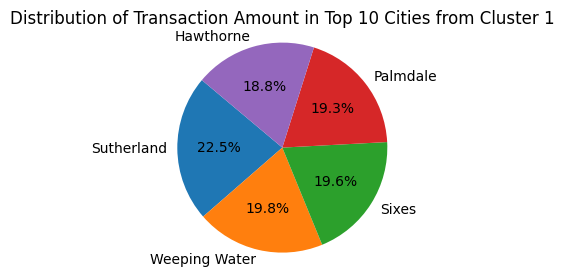

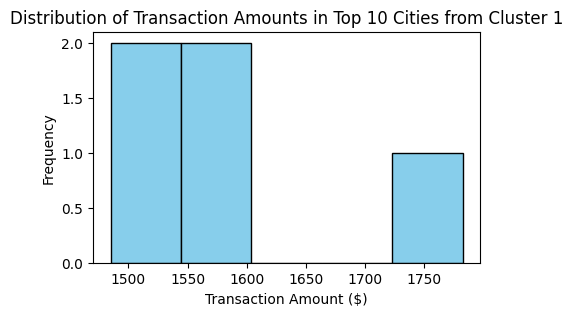

In [ ]:

import matplotlib.pyplot as plt


cluster_1_data = df_hi[df_hi['Hierarchical_Cluster'] == 1]
top_10_cities_cluster_1 = cluster_1_data.nlargest(5, 'amt')


plt.figure(figsize=(5, 3))
plt.pie(top_10_cities_cluster_1['amt'], labels=top_10_cities_cluster_1['city'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transaction Amount in Top 10 Cities from Cluster 1')
plt.axis('equal')
plt.show()

plt.figure(figsize=(5, 3))
plt.hist(top_10_cities_cluster_1['amt'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts in Top 10 Cities from Cluster 1')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.show()


###**Karakterisitik masing-masing cluster hasil single linkage clustering**
Dari hasil clsuterisasi, didapati bahwa

Hierarchical_Cluster
1.   14441
2.   3
3.   2




Cluster 1:

Rata-rata jumlah transaksi (amt): 121.74
Rata-rata longitude merchant (merch_long): -110.83
Karakteristik: Cluster ini menunjukkan rata-rata jumlah transaksi yang paling rendah dibandingkan dengan cluster lainnya. Hal ini terjadi karena banyaknya data. Lokasi rata-rata merchant berada pada longitude sekitar -110.83, yang kemungkinan menggambarkan wilayah di tengah atau barat Amerika, daerah dengan populasi lebih tersebar atau semi-urban.
Interpretasi: Pelanggan di cluster ini cenderung memiliki transaksi yang lebih kecil dan berada di daerah yang lebih jarang penduduknya, seperti kota kecil atau wilayah yang lebih terpencil.




Cluster 2:

Rata-rata jumlah transaksi (amt): 3198.24
Rata-rata longitude merchant (merch_long): -122.37
Karakteristik: Cluster ini memiliki jumlah transaksi rata-rata tertinggi, menunjukkan bahwa pelanggan di sini melakukan pembelian dengan nilai lebih besar. Lokasi rata-rata merchant berada pada longitude sekitar -122.37, yang mungkin mencerminkan daerah perkotaan besar, seperti wilayah pesisir barat Amerika (misalnya, dekat San Francisco).

Interpretasi: Cluster ini mewakili pelanggan premium atau pelanggan yang lebih aktif secara finansial, kemungkinan besar berada di area perkotaan besar atau metropolitan.



Cluster 3:
Rata-rata jumlah transaksi (amt): 2514.43
Rata-rata longitude merchant (merch_long): -106.06
Karakteristik: Cluster ini memiliki rata-rata jumlah transaksi yang cukup besar, meskipun lebih rendah dibandingkan cluster 1. Lokasi rata-rata berada pada longitude sekitar -106.06, yang bisa menunjukkan wilayah di barat daya Amerika Serikat. (Texas gurun)

Interpretasi: Pelanggan di cluster ini melakukan transaksi dalam jumlah menengah, dan kemungkinan besar berada di wilayah yang lebih urban atau semi-urban dengan tingkat aktivitas ekonomi yang cukup tinggi.

##5 kota terbanyak melakukan transaksi berdasarkan distribusi cluster 1
Proporsi Transaksi per Kota:

*   Proporsi Transasi Per-Kota

    Kota Sutherland memiliki jumlah transaksi terbesar di antara kota lainnya, yaitu sekitar 22,5%.
    Diikuti oleh Weeping Water dengan transaksi sebesar 19,8%.
    Kota Sixes dan Palmdale memiliki persentase yang hampir sama, masing-masing 19,6% dan 19,3%.Sementara itu, Hawthorne memiliki persentase transaksi terkecil, yaitu 18,8%.


*   Secara keseluruhan, terlihat bahwa distribusi transaksi antar kota di Cluster 1 cukup merata. Meskipun Sutherland sedikit lebih dominan, perbedaan antara kota-kota lainnya tidak terlalu signifikan.
Semua kota memiliki persentase transaksi yang berada dalam kisaran 18,8% hingga 22,5%, yang menunjukkan bahwa transaksi tersebar cukup seimbang.




##Dari hasil clustering single linkage, rekomendasi yang sesuai untuk menaikkan jumlah transaksi kedepannya adalah

* Fokus pada Kota-Kota Besar: Karena pelanggan dengan transaksi besar kebanyakan berasal dari kota besar, strategi pemasaran bisa difokuskan di wilayah metropolitan. Kota-kota besar yang aktif secara ekonomi memiliki potensi transaksi yang lebih tinggi dan bisa menjadi target utama.

* Promosi Khusus untuk Pelanggan Menengah: Untuk pelanggan di cluster dengan transaksi menengah (seperti cluster 2), Loans 'R Us bisa menawarkan promosi atau program khusus, seperti program loyalitas atau diskon, untuk mendorong mereka melakukan transaksi lebih banyak.

* Perluas Layanan di Kota Kecil: Walaupun pelanggan di cluster 1 memiliki transaksi lebih kecil, menyediakan produk yang lebih terjangkau dan memperkenalkan layanan di kota-kota kecil dan daerah semi-urban dapat membantu menarik lebih banyak pelanggan baru dan meningkatkan jumlah transaksi.


## 3. Untuk membantu pekerja frontline dalam menilai penipuan kartu kredit, Anda perlu membuat model klasifikasi (K nearest neighbor, Naïve Bayes, dll.) berdasarkan kumpulan data yang tersedia untuk Anda. Anda bebas menggunakan variabel apa pun dalam dataset. Salah satu karyawan Anda menyarankan untuk membagi kumpulan data menjadi dua (pelatihan dan pengujian) untuk membuat model klasifikasi ini. Karena ketidak rataan data, pendekatan bertingkat untuk membagi kumpulan data mungkin diperlukan.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = 'fraud.xlsx'


In [ ]:
data_fraud = pd.read_excel(dataset_path)

In [ ]:
def convert_datetime(value):
    if pd.isna(value):
        return pd.NaT
    for fmt in ('%Y-%m-%d %H:%M:%S', '%d-%m-%Y %H:%M','%d-%m-%Y'):
        try:
            return pd.to_datetime(value, format=fmt)
        except ValueError:
            continue
    print(f"Gagal mengonversi: {value}")
    return pd.NaT

data_fraud['trans_date_trans_time'] = data_fraud['trans_date_trans_time'].apply(convert_datetime)

In [ ]:
data_fraud['dob'] = data_fraud['dob'].apply(convert_datetime)

In [ ]:
data_fraud['is_fraud'].value_counts()

is_fraud
0                         12600
1                          1844
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: count, dtype: int64

In [ ]:
data_fraud['is_fraud'] = data_fraud['is_fraud'].apply(lambda x: int(str(x)[0]) if isinstance(x, str) and '"' in x else x)
data_fraud['is_fraud'].value_counts()

is_fraud
0    12601
1     1845
Name: count, dtype: int64

In [ ]:
duplicates = data_fraud[data_fraud.duplicated(subset='trans_num', keep=False)]
data_fraud = data_fraud.drop_duplicates(subset='trans_num', keep='first')

In [ ]:
data_fraud['hour'] = data_fraud['trans_date_trans_time'].dt.hour
data_fraud['day_of_week'] = data_fraud['trans_date_trans_time'].dt.dayofweek
data_fraud['day_of_month'] = data_fraud['trans_date_trans_time'].dt.day
data_fraud['month'] = data_fraud['trans_date_trans_time'].dt.month

In [ ]:
data_fraud = data_fraud.drop(['trans_num','trans_date_trans_time','dob'],axis = 1)

In [ ]:
data_fraud

merchant        category     amt        city  \
0      "Stokes, Christiansen and Sipes"     grocery_net   14.37       Wales   
1                          Predovic Inc    shopping_net  966.11       Wales   
2                       Wisozk and Sons        misc_pos   49.61       Wales   
3                        Murray-Smitham     grocery_pos  295.26       Wales   
4                            Friesen Lt  health_fitness   18.17       Wales   
...                                 ...             ...     ...         ...   
14441                      Hudson-Grady    shopping_pos  122.00      Athena   
14442    "Nienow, Ankunding and Collie"        misc_pos    9.07    Gardiner   
14443                  Pacocha-O'Reilly     grocery_pos  104.84        Alva   
14444     "Bins, Balistreri and Beatty"    shopping_pos  268.16       Wales   
14445                Daugherty-Thompson     food_dining   50.09  Unionville   

      state      lat      long  city_pop                                job  \
0        AK  64.7556 -165.6723       145         "Administrator, education"   
1        AK  64.7556 -165.6723       145         "Administrator, education"   
2        AK  64.7556 -165.6723       145         "Administrator, education"   
3        AK  64.7556 -165.6723       145         "Administrator, education"   
4        AK  64.7556 -165.6723       145         "Administrator, education"   
...     ...      ...       ...       ...                                ...   
14441    OR  45.8289 -118.4971      1302                             Dealer   
14442    OR  43.7857 -124.1437       260            "Engineer, maintenance"   
14443    WY  44.6873 -104.4414       110  "Administrator, local government"   
14444    AK  64.7556 -165.6723       145         "Administrator, education"   
14445    MO  40.4815  -92.9951      3805     "Investment banker, corporate"   

       merch_lat  merch_long  is_fraud  hour  day_of_week  day_of_month  month  
0      65.654142 -164.722603         1     0            0             1      4  
1      65.468863 -165.473127         1    15            0             1      4  
2      65.347667 -165.914542         1    22            0             1      4  
3      64.445035 -166.080207         1    23            0             1      4  
4      65.447094 -165.446843         1    23            0             1      4  
...          ...         ...       ...   ...          ...           ...    ...  
14441  46.442439 -118.524214         0     0            1            22      1  
14442  42.901265 -124.995317         0     0            1            22      1  
14443  45.538062 -104.542117         0     0            1            22      1  
14444  64.081462 -165.898698         0     0            1            22      1  
14445  40.387243  -92.224871         0     0            1            22      1  

[14383 rows x 16 columns]

In [ ]:
columns_to_encode = ['category']
data_encoded = pd.get_dummies(data_fraud, columns=columns_to_encode)

boolean_columns = data_encoded.select_dtypes(include=['bool']).columns

data_encoded[boolean_columns] = data_encoded[boolean_columns].astype(int)

In [ ]:
label_encoder = LabelEncoder()
label = ['category','job','merchant','lat','long','city_pop','city','state',]
for i in label:
  data_fraud[i] = label_encoder.fit_transform(data_fraud[i])

data_fraud

merchant  category     amt  city  state  lat  long  city_pop  job  \
0           179         3   14.37   166      0  180     0        15    1   
1           564        11  966.11   166      0  180     0        15    1   
2           682         9   49.61   166      0  180     0        15    1   
3           537         4  295.26   166      0  180     0        15    1   
4           352         5   18.17   166      0  180     0        15    1   
...         ...       ...     ...   ...    ...  ...   ...       ...  ...   
14441       411        12  122.00     8      9  165    55        76   78   
14442       126         9    9.07    48      9  147     9        25   16   
14443       549         4  104.84     2     12  153   129         8    2   
14444        14        12  268.16   166      0  180     0        15    1   
14445       311         1   50.09   160      6  109   167       102   21   

       merch_lat  merch_long  is_fraud  hour  day_of_week  day_of_month  month  
0      65.654142 -164.722603         1     0            0             1      4  
1      65.468863 -165.473127         1    15            0             1      4  
2      65.347667 -165.914542         1    22            0             1      4  
3      64.445035 -166.080207         1    23            0             1      4  
4      65.447094 -165.446843         1    23            0             1      4  
...          ...         ...       ...   ...          ...           ...    ...  
14441  46.442439 -118.524214         0     0            1            22      1  
14442  42.901265 -124.995317         0     0            1            22      1  
14443  45.538062 -104.542117         0     0            1            22      1  
14444  64.081462 -165.898698         0     0            1            22      1  
14445  40.387243  -92.224871         0     0            1            22      1  

[14383 rows x 16 columns]

In [ ]:
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   merchant      14383 non-null  int64  
 1   category      14383 non-null  int64  
 2   amt           14383 non-null  float64
 3   city          14383 non-null  int64  
 4   state         14383 non-null  int64  
 5   lat           14383 non-null  int64  
 6   long          14383 non-null  int64  
 7   city_pop      14383 non-null  int64  
 8   job           14383 non-null  int64  
 9   merch_lat     14383 non-null  float64
 10  merch_long    14383 non-null  float64
 11  is_fraud      14383 non-null  int64  
 12  hour          14383 non-null  int32  
 13  day_of_week   14383 non-null  int32  
 14  day_of_month  14383 non-null  int32  
 15  month         14383 non-null  int32  
dtypes: float64(3), int32(4), int64(9)
memory usage: 1.6 MB


In [ ]:
data_fraud

merchant  category     amt  city  state  lat  long  city_pop  job  \
0           179         3   14.37   166      0  180     0        15    1   
1           564        11  966.11   166      0  180     0        15    1   
2           682         9   49.61   166      0  180     0        15    1   
3           537         4  295.26   166      0  180     0        15    1   
4           352         5   18.17   166      0  180     0        15    1   
...         ...       ...     ...   ...    ...  ...   ...       ...  ...   
14441       411        12  122.00     8      9  165    55        76   78   
14442       126         9    9.07    48      9  147     9        25   16   
14443       549         4  104.84     2     12  153   129         8    2   
14444        14        12  268.16   166      0  180     0        15    1   
14445       311         1   50.09   160      6  109   167       102   21   

       merch_lat  merch_long  is_fraud  hour  day_of_week  day_of_month  month  
0      65.654142 -164.722603         1     0            0             1      4  
1      65.468863 -165.473127         1    15            0             1      4  
2      65.347667 -165.914542         1    22            0             1      4  
3      64.445035 -166.080207         1    23            0             1      4  
4      65.447094 -165.446843         1    23            0             1      4  
...          ...         ...       ...   ...          ...           ...    ...  
14441  46.442439 -118.524214         0     0            1            22      1  
14442  42.901265 -124.995317         0     0            1            22      1  
14443  45.538062 -104.542117         0     0            1            22      1  
14444  64.081462 -165.898698         0     0            1            22      1  
14445  40.387243  -92.224871         0     0            1            22      1  

[14383 rows x 16 columns]

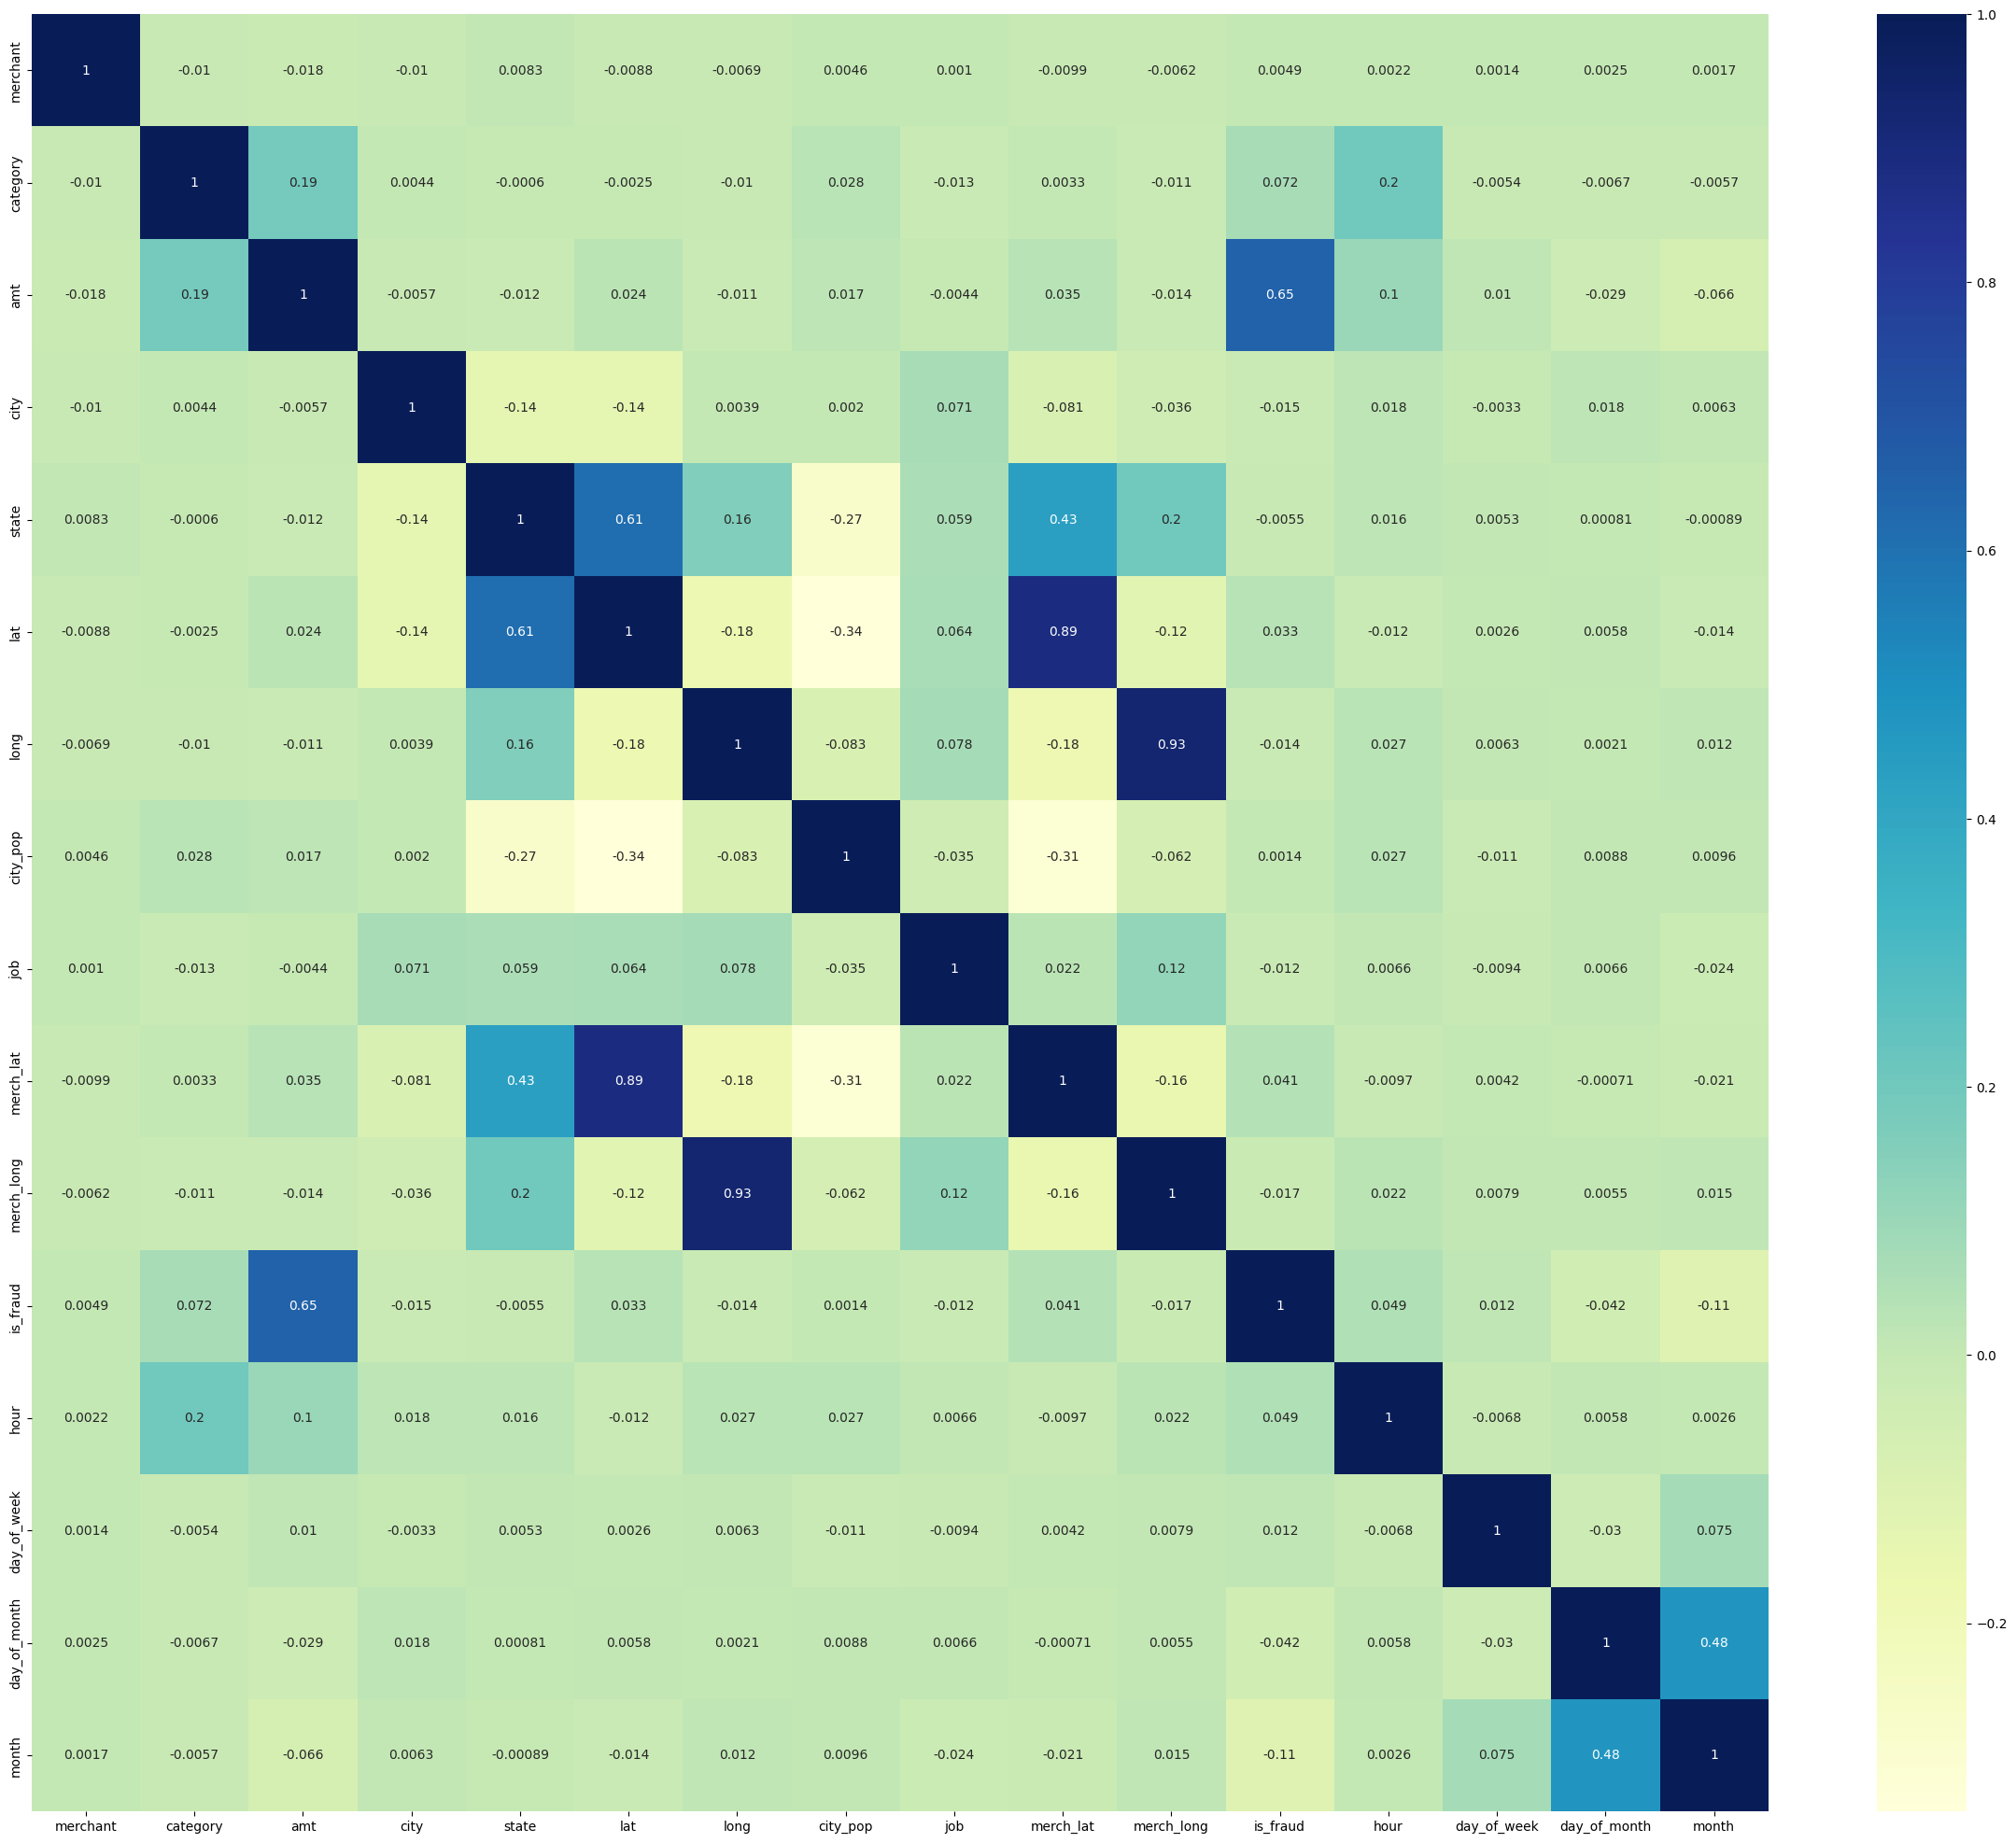

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(data_fraud.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
data_fraud

merchant  category     amt  city  state  lat  long  city_pop  job  \
0           179         3   14.37   166      0  180     0        15    1   
1           564        11  966.11   166      0  180     0        15    1   
2           682         9   49.61   166      0  180     0        15    1   
3           537         4  295.26   166      0  180     0        15    1   
4           352         5   18.17   166      0  180     0        15    1   
...         ...       ...     ...   ...    ...  ...   ...       ...  ...   
14441       411        12  122.00     8      9  165    55        76   78   
14442       126         9    9.07    48      9  147     9        25   16   
14443       549         4  104.84     2     12  153   129         8    2   
14444        14        12  268.16   166      0  180     0        15    1   
14445       311         1   50.09   160      6  109   167       102   21   

       merch_lat  merch_long  is_fraud  hour  day_of_week  day_of_month  month  
0      65.654142 -164.722603         1     0            0             1      4  
1      65.468863 -165.473127         1    15            0             1      4  
2      65.347667 -165.914542         1    22            0             1      4  
3      64.445035 -166.080207         1    23            0             1      4  
4      65.447094 -165.446843         1    23            0             1      4  
...          ...         ...       ...   ...          ...           ...    ...  
14441  46.442439 -118.524214         0     0            1            22      1  
14442  42.901265 -124.995317         0     0            1            22      1  
14443  45.538062 -104.542117         0     0            1            22      1  
14444  64.081462 -165.898698         0     0            1            22      1  
14445  40.387243  -92.224871         0     0            1            22      1  

[14383 rows x 16 columns]

In [ ]:
data_encoded = data_encoded.drop(['merchant','city','day_of_week',	'day_of_month',	'merch_long','state','lat','long','city_pop','job'],axis=1)
data_encoded

amt  merch_lat  is_fraud  hour  month  category_entertainment  \
0       14.37  65.654142         1     0      4                       0   
1      966.11  65.468863         1    15      4                       0   
2       49.61  65.347667         1    22      4                       0   
3      295.26  64.445035         1    23      4                       0   
4       18.17  65.447094         1    23      4                       0   
...       ...        ...       ...   ...    ...                     ...   
14441  122.00  46.442439         0     0      1                       0   
14442    9.07  42.901265         0     0      1                       0   
14443  104.84  45.538062         0     0      1                       0   
14444  268.16  64.081462         0     0      1                       0   
14445   50.09  40.387243         0     0      1                       0   

       category_food_dining  category_gas_transport  category_grocery_net  \
0                         0                       0                     1   
1                         0                       0                     0   
2                         0                       0                     0   
3                         0                       0                     0   
4                         0                       0                     0   
...                     ...                     ...                   ...   
14441                     0                       0                     0   
14442                     0                       0                     0   
14443                     0                       0                     0   
14444                     0                       0                     0   
14445                     1                       0                     0   

       category_grocery_pos  category_health_fitness  category_home  \
0                         0                        0              0   
1                         0                        0              0   
2                         0                        0              0   
3                         1                        0              0   
4                         0                        1              0   
...                     ...                      ...            ...   
14441                     0                        0              0   
14442                     0                        0              0   
14443                     1                        0              0   
14444                     0                        0              0   
14445                     0                        0              0   

       category_kids_pets  category_misc_net  category_misc_pos  \
0                       0                  0                  0   
1                       0                  0                  0   
2                       0                  0                  1   
3                       0                  0                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
14441                   0                  0                  0   
14442                   0                  0                  1   
14443                   0                  0                  0   
14444                   0                  0                  0   
14445                   0                  0                  0   

       category_personal_care  category_shopping_net  category_shopping_pos  \
0                           0                      0                      0   
1                           0                      1                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      14383 non-null  float64
 1   merch_lat                14383 non-null  float64
 2   is_fraud                 14383 non-null  int64  
 3   hour                     14383 non-null  int32  
 4   month                    14383 non-null  int32  
 5   category_entertainment   14383 non-null  int64  
 6   category_food_dining     14383 non-null  int64  
 7   category_gas_transport   14383 non-null  int64  
 8   category_grocery_net     14383 non-null  int64  
 9   category_grocery_pos     14383 non-null  int64  
 10  category_health_fitness  14383 non-null  int64  
 11  category_home            14383 non-null  int64  
 12  category_kids_pets       14383 non-null  int64  
 13  category_misc_net        14383 non-null  int64  
 14  category_misc_pos        14

In [ ]:
X = data_encoded.drop(columns=['is_fraud'])
y = data_encoded.pop('is_fraud')

In [ ]:
X

amt  merch_lat  hour  month  category_entertainment  \
0       14.37  65.654142     0      4                       0   
1      966.11  65.468863    15      4                       0   
2       49.61  65.347667    22      4                       0   
3      295.26  64.445035    23      4                       0   
4       18.17  65.447094    23      4                       0   
...       ...        ...   ...    ...                     ...   
14441  122.00  46.442439     0      1                       0   
14442    9.07  42.901265     0      1                       0   
14443  104.84  45.538062     0      1                       0   
14444  268.16  64.081462     0      1                       0   
14445   50.09  40.387243     0      1                       0   

       category_food_dining  category_gas_transport  category_grocery_net  \
0                         0                       0                     1   
1                         0                       0                     0   
2                         0                       0                     0   
3                         0                       0                     0   
4                         0                       0                     0   
...                     ...                     ...                   ...   
14441                     0                       0                     0   
14442                     0                       0                     0   
14443                     0                       0                     0   
14444                     0                       0                     0   
14445                     1                       0                     0   

       category_grocery_pos  category_health_fitness  category_home  \
0                         0                        0              0   
1                         0                        0              0   
2                         0                        0              0   
3                         1                        0              0   
4                         0                        1              0   
...                     ...                      ...            ...   
14441                     0                        0              0   
14442                     0                        0              0   
14443                     1                        0              0   
14444                     0                        0              0   
14445                     0                        0              0   

       category_kids_pets  category_misc_net  category_misc_pos  \
0                       0                  0                  0   
1                       0                  0                  0   
2                       0                  0                  1   
3                       0                  0                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
14441                   0                  0                  0   
14442                   0                  0                  1   
14443                   0                  0                  0   
14444                   0                  0                  0   
14445                   0                  0                  0   

       category_personal_care  category_shopping_net  category_shopping_pos  \
0                           0                      0                      0   
1                           0                      1                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
14441                       0                      0                      1   
14442         

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14441    0
14442    0
14443    0
14444    0
14445    0
Name: is_fraud, Length: 14383, dtype: int64

In [ ]:
!pip install imblearn
!pip install pipeline
!pip install Pipeline
!pip install over_sampling
!pip install SMOTE
!pip install under_sampling
!pip install RandomUnderSampler
!pip install lightgbm




ERROR: Could not find a version that satisfies the requirement over_sampling (from versions: none)
ERROR: No matching distribution found for over_sampling
ERROR: Could not find a version that satisfies the requirement under_sampling (from versions: none)
ERROR: No matching distribution found for under_sampling
ERROR: Could not find a version that satisfies the requirement RandomUnderSampler (from versions: none)
ERROR: No matching distribution found for RandomUnderSampler


In [ ]:
import re
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##Mengatasi Imbalance Data menggunakan SMOTE dan Random Under Sampler

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


smote_ratio = 0.5
under_ratio = 0.8
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=smote_ratio, random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy=under_ratio, random_state=42))
])


X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

is_fraud
0    5518
1    4415
Name: count, dtype: int64

[LightGBM] [Info] Number of positive: 4415, number of negative: 5518
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 9933, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444478 -> initscore=-0.223008
[LightGBM] [Info] Start training from score -0.223008
Accuracy: 0.9809965237543453
Confusion Matrix:
 [[3707   64]
 [  18  526]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3771
           1       0.89      0.97      0.93       544

    accuracy                           0.98      4315
   macro avg       0.94      0.97      0.96      4315
weighted avg       0.98      0.98      0.98      4315



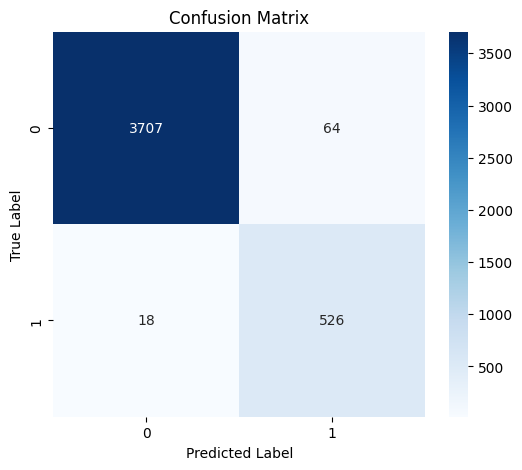

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


model = LGBMClassifier(boosting_type='gbdt', random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


[LightGBM] [Info] Number of positive: 4415, number of negative: 5518
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 9933, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444478 -> initscore=-0.223008
[LightGBM] [Info] Start training from score -0.223008
Accuracy: 0.9809965237543453
Confusion Matrix:
 [[3707   64]
 [  18  526]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3771
           1       0.89      0.97      0.93       544

    accuracy                           0.98      4315
   macro avg       0.94      0.97      0.96      4315
weighted avg       0.98      0.98      0.98      4315



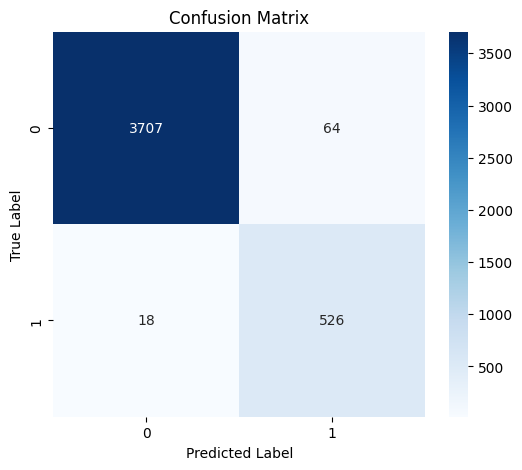

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model = LGBMClassifier(random_state=42)


model.fit(X_train,y_train)


y_pred_lgbm = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
!pip install catboost

Accuracy: 0.9796060254924681
Confusion Matrix:
 [[3702   69]
 [  19  525]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3771
           1       0.88      0.97      0.92       544

    accuracy                           0.98      4315
   macro avg       0.94      0.97      0.96      4315
weighted avg       0.98      0.98      0.98      4315



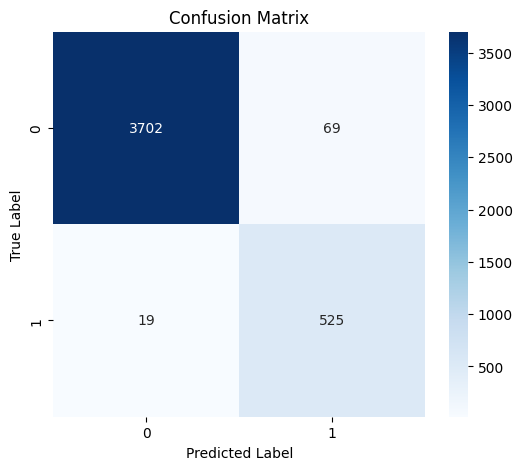

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model = CatBoostClassifier(random_state=42,verbose=0)


model.fit(X_train,y_train)

y_pred_ctb_cls = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_ctb_cls))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ctb_cls))
print("Classification Report:\n", classification_report(y_test, y_pred_ctb_cls))
cm = confusion_matrix(y_test, y_pred_ctb_cls)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
!pip install xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[13:03:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.9821552723059096
Confusion Matrix:
 [[3711   60]
 [  17  527]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3771
           1       0.90      0.97      0.93       544

    accuracy                           0.98      4315
   macro avg       0.95      0.98      0.96      4315
weighted avg       0.98      0.98      0.98      4315



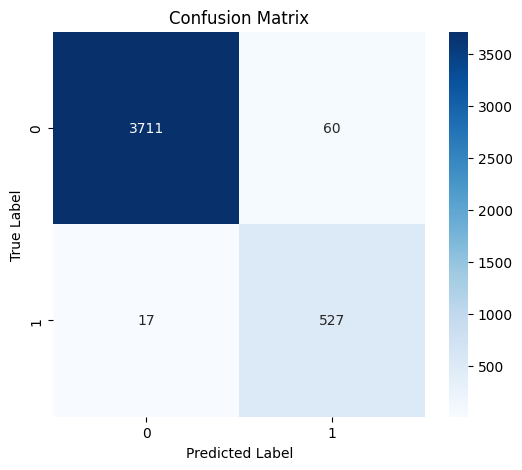

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


model.fit(X_train, y_train)


y_pred_xgbc = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_xgbc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgbc))
print("Classification Report:\n", classification_report(y_test, y_pred_xgbc))


cm = confusion_matrix(y_test, y_pred_xgbc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## a. Jelaskan variabel apa yang Anda gunakan dari kumpulan data, metode klasifikasi yang digunakan, dan bagaimana kumpulan data tersebut dibagi menjadi data pelatihan dan pengujian.

Dalam kumpulan data yang tersedia, sepuluh variabel dengan korelasi terendah terhadap is_fraud, yaitu merchant, city, day_of_week, day_of_month, merch_long, state, lat, long, city_pop, dan job, telah dihapus. Variabel-variabel yang tersisa kemudian digunakan sebagai variabel prediktor (X), sedangkan variabel is_fraud dipilih sebagai variabel target (Y). Selanjutnya, data tersebut dibagi menjadi data latih (train data) dan data uji (test data) menggunakan modul train_test_split dari sklearn.model_selection dengan rasio 7:3, di mana 70% digunakan sebagai data latih dan 30% sebagai data uji.

##b. beberapa bagus model klasifikasi Anda?
  i. Berapa banyak yang diprediksi sebagai penipuan sebenarnya adalah penipuan

  ii. Berapa banyak yang digadang-gadang sebagai penipuan sebenarnya bukanlah penipuan

  iii. Berapa banyak yang digadang-gadang bukan penipu ternyata bukan penipu

  iv. Berapa banyak yang digadang-gadang bukan penipu, ternyata penipuan

  

  Berdasarkan confusion matrix dari hasil prediksi model terbaik, yaitu XGBClassifier, yang mencapai akurasi sebesar 98,2%, hasil prediksi model dapat dirinci sebagai berikut: sebanyak 527 data diprediksi sebagai tindakan penipuan dan benar-benar merupakan penipuan, sedangkan 17 data diprediksi sebagai penipuan namun sebenarnya bukan penipuan. Sebanyak 3.711 data diprediksi sebagai bukan penipuan dan benar-benar bukan penipuan, sedangkan 60 data diprediksi sebagai bukan penipuan namun ternyata merupakan tindakan penipuan.

  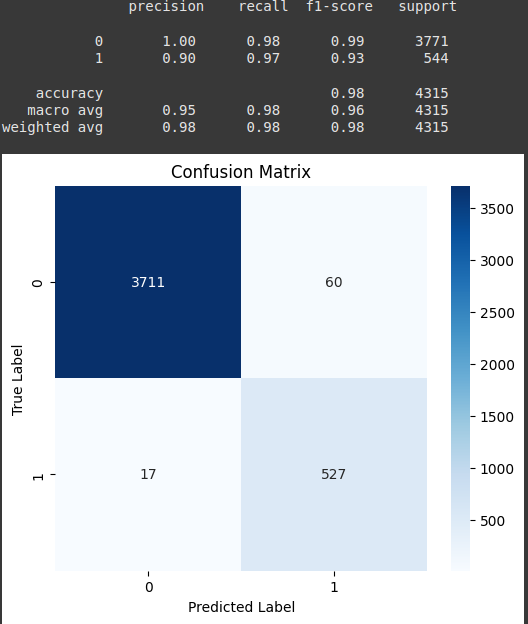



##c.Jelaskan bagaimana Anda akan menggunakan model yang baru dibuat ini untuk membantu pekerja frontline mengambil keputusan berdasarkan prediksi yang dibuat oleh model tersebut.


Model XGBoost Classifier yang memiliki akurasi 98,2% dalam mendeteksi potensi penipuan dapat digunakan untuk membantu pekerja frontline dalam mengambil keputusan terkait transaksi mencurigakan. Dalam penerapannya, model ini memungkinkan sistem untuk memberikan prioritas verifikasi pada transaksi yang terindikasi sebagai penipuan.

Ketika ada transaksi yang diprediksi sebagai penipuan, sistem akan otomatis menandai transaksi tersebut sebagai prioritas untuk ditinjau oleh petugas frontline. Selama proses verifikasi ini, transaksi akan ditahan sementara di sisi pelanggan hingga ada konfirmasi lebih lanjut dari petugas. Berdasarkan penelitian Aishwarya Vuppala dan rekan-rekannya, jika penipuan benar-benar terkonfirmasi, risiko pada transaksi pelanggan dapat diminimalkan dengan kebijakan pemblokiran transaksi, sehingga menghindarkan mereka dari dampak negatif yang lebih jauh.

Model ini bukan hanya membantu pekerja frontline dalam mendeteksi transaksi berisiko tinggi secara lebih cepat dan tepat, tetapi juga menjadi langkah pencegahan yang melindungi pelanggan dari risiko penipuan.


sumber : (https://www.ijiemr.org/public/uploads/paper/203911652362873.pdf)